# Bussiness Case

The business problem is predicting customer retention potential in the retail industry to reduce customer churn and increase profitability. By identifying customers at risk of churning, targeted offers, promotions, and personalized services can be provided to improve customer experience and reduce churn rate. Segmenting customers based on their retention potential helps identify specific needs and behaviors to develop tailored marketing and engagement strategies, resulting in increased sales and profitability.

# ML Problem Statement

The business problem of customer retention is converted into a machine learning problem by using historical data about customers' transactions, interactions, and preferences to predict their retention potential level as high/medium/low. This is done using a predictive model trained on the historical data, which can then be used to predict the retention potential of new customers. The model can help the business to target its marketing programs more effectively by directing them towards customers who are likely to be retained or have a high probability of retention. This can result in increased customer engagement, sales, and profitability for the business.



# Dataset Discription


# Overview:

The datasets have different numbers of rows and columns, but they are all related to customer transactions, email interactions, and profile information. They can be merged using the common Customer ID column to obtain a more comprehensive dataset for analysis and model building.

Some important parameters that may be useful for analysis and model building include the date of order, quantity, price, email type, and customer profile information such as city, date of registration, and language preference. Additionally, the target attribute (RetentionPotential) is a crucial parameter for building a predictive model to segment customers based on their likelihood to churn.




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Train_Datasets

In [3]:
TrainData1 = pd.read_excel('/content/drive/MyDrive/Train_Data/Customerdata_Train.xlsx')
TrainData2 = pd.read_excel('/content/drive/MyDrive/Train_Data/Emaildata_Train.xlsx')
TrainData3 = pd.read_excel('/content/drive/MyDrive/Train_Data/transactionsdata_Train.xlsx')
Target = pd.read_excel('/content/drive/MyDrive/Train_Data/Train.xlsx')

# Converting Excel to CSV Files

In [4]:
TrainData1.to_csv('Customerdata_Train.csv', index=False)
TrainData2.to_csv('Emaildata_Train.csv', index=False)
TrainData3.to_csv('transactionsdata_Train.csv', index=False)
Target.to_csv('Train.csv', index=False)

# Train_Data_1

In [5]:
TrainData1.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')

In [6]:
TrainData1.shape

(23820, 7)

In [7]:
TrainData1.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday


# Target Data

In [8]:
Target.shape

(23820, 2)

In [9]:
Target.head()

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High


In [10]:
Target.columns

Index(['CustomerID', 'RetentionPotential'], dtype='object')

# Train_Data_2

In [11]:
TrainData2.nunique()

CustomerID     23820
DateOfemail     3382
EmailType          2
timestamp      14369
MailOpened         2
MailClicked        3
dtype: int64

In [12]:
TrainData2.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [13]:
TrainData2.drop(['DateOfemail','timestamp'],axis=1,inplace=True)

In [14]:
TrainData2.head()

,CustomerID,EmailType,MailOpened,MailClicked
0,C16368,WelcomeEmail,yes,NotApplicable
1,C20345,WelcomeEmail,yes,NotApplicable
2,C17683,WelcomeEmail,yes,NotApplicable
3,C18647,WelcomeEmail,yes,NotApplicable
4,C36692,WelcomeEmail,yes,NotApplicable


In [15]:
TrainData2.drop_duplicates(keep='first',inplace=True)

In [16]:
TrainData2.shape

(57829, 4)

In [17]:
TrainData2['EmailType'].value_counts()

CustomizedEmail    34009
WelcomeEmail       23820
Name: EmailType, dtype: int64

In [18]:
TrainData2['MailOpened'].value_counts()

yes    43883
no     13946
Name: MailOpened, dtype: int64

In [19]:
TrainData2['MailClicked'].value_counts()

no               25373
NotApplicable    23820
yes               8636
Name: MailClicked, dtype: int64

# Checking CustomerID & EmailType

In [20]:
TrainData2_new1=TrainData2[['CustomerID','EmailType']]
TrainData2_new1.head()

,CustomerID,EmailType
0,C16368,WelcomeEmail
1,C20345,WelcomeEmail
2,C17683,WelcomeEmail
3,C18647,WelcomeEmail
4,C36692,WelcomeEmail


In [21]:
TrainData2_new1.shape

(57829, 2)

In [22]:
TrainData2_new1.shape

(57829, 2)

In [23]:

TrainData2_new1.drop('EmailType',axis=1,inplace=True)

In [24]:
# Count the number of repeated customers and add a new column
TrainData2_new1['Types_of_mails_received']=TrainData2_new1.groupby(by='CustomerID',as_index=False)['CustomerID'].count()

In [25]:
TrainData2_new1.head()

,CustomerID,Types_of_mails_received
0,C16368,4.0
1,C20345,1.0
2,C17683,1.0
3,C18647,4.0
4,C36692,1.0


In [26]:
TrainData2_new1.shape

(57829, 2)

In [27]:
TrainData2_new1.isnull().sum()

CustomerID                     0
Types_of_mails_received    34009
dtype: int64

In [28]:
37931-14111

23820

In [29]:
TrainData2_new1.dropna(inplace=True)

In [30]:
TrainData2_new1.isnull().sum()

CustomerID                 0
Types_of_mails_received    0
dtype: int64

In [31]:
TrainData2_new1.shape

(23820, 2)

In [32]:
TrainData2_new1.head()

,CustomerID,Types_of_mails_received
0,C16368,4.0
1,C20345,1.0
2,C17683,1.0
3,C18647,4.0
4,C36692,1.0


In [33]:
TrainData2_new1[TrainData2_new1['CustomerID']=='C16368']

,CustomerID,Types_of_mails_received
0,C16368,4.0


# Checking CustomerID & MailClicked

In [34]:
TrainData2_new2=TrainData2[['CustomerID','MailClicked']]
TrainData2_new2.head()

,CustomerID,MailClicked
0,C16368,NotApplicable
1,C20345,NotApplicable
2,C17683,NotApplicable
3,C18647,NotApplicable
4,C36692,NotApplicable


In [35]:
TrainData2_new2['MailClicked'].value_counts()

no               25373
NotApplicable    23820
yes               8636
Name: MailClicked, dtype: int64

In [36]:
count_mailclicked = lambda x: (x == 'yes').sum()

# Add a new column with the count of MailClicked 'Yes' for each CustomerID using groupby and transform with the lambda function
TrainData2_new2['No_of_times_mail_clicked'] = TrainData2_new2.groupby('CustomerID')['MailClicked'].transform(count_mailclicked)


In [37]:
TrainData2_new2.head()

,CustomerID,MailClicked,No_of_times_mail_clicked
0,C16368,NotApplicable,1
1,C20345,NotApplicable,1
2,C17683,NotApplicable,0
3,C18647,NotApplicable,1
4,C36692,NotApplicable,1


In [38]:
TrainData2_new2[TrainData2_new2['CustomerID']=='C17683']

,CustomerID,MailClicked,No_of_times_mail_clicked
2,C17683,NotApplicable,0


In [39]:
TrainData2_new2.drop('MailClicked',axis=1,inplace=True)

In [40]:
TrainData2_new2.drop_duplicates(keep='first',inplace=True)

In [41]:
TrainData2_new2.head()

,CustomerID,No_of_times_mail_clicked
0,C16368,1
1,C20345,1
2,C17683,0
3,C18647,1
4,C36692,1


In [42]:
TrainData2_new2.isnull().sum()

CustomerID                  0
No_of_times_mail_clicked    0
dtype: int64

In [43]:
TrainData2_new2.shape

(23820, 2)

# Checking CustomerID & MailOpened

In [44]:
TrainData2_new3=TrainData2[['CustomerID','MailOpened']]
TrainData2_new3.head()

,CustomerID,MailOpened
0,C16368,yes
1,C20345,yes
2,C17683,yes
3,C18647,yes
4,C36692,yes


In [45]:
TrainData2_new3['MailOpened'].value_counts()

yes    43883
no     13946
Name: MailOpened, dtype: int64

In [46]:
TrainData2_new3.shape

(57829, 2)

In [47]:
TrainData2_new3.isnull().sum()

CustomerID    0
MailOpened    0
dtype: int64

In [48]:

count_MailOpened = lambda x: (x == 'yes').sum()

#Add a new column with the count of MailOpened 'Yes' for each CustomerID using groupby and transform with the lambda function
TrainData2_new3['No_of_times_mail_opened'] = TrainData2_new3.groupby('CustomerID')['MailOpened'].transform(count_MailOpened)

In [49]:
TrainData2_new3.head()

,CustomerID,MailOpened,No_of_times_mail_opened
0,C16368,yes,3
1,C20345,yes,3
2,C17683,yes,1
3,C18647,yes,3
4,C36692,yes,3


In [50]:
TrainData2_new3.shape

(57829, 3)

In [51]:
TrainData2_new3[TrainData2_new3['CustomerID']=='C17683']

,CustomerID,MailOpened,No_of_times_mail_opened
2,C17683,yes,1


In [52]:
TrainData2_new3.drop('MailOpened',axis=1,inplace=True)

In [53]:
TrainData2_new3.drop_duplicates(keep='first',inplace=True)

In [54]:
TrainData2_new3.head()

,CustomerID,No_of_times_mail_opened
0,C16368,3
1,C20345,3
2,C17683,1
3,C18647,3
4,C36692,3


In [55]:
TrainData2_new3.value_counts()

CustomerID  No_of_times_mail_opened
C12116      3                          1
C32156      1                          1
C32168      1                          1
C32167      1                          1
C32166      1                          1
                                      ..
C22202      1                          1
C22201      1                          1
C22200      3                          1
C22197      1                          1
C42189      2                          1
Length: 23820, dtype: int64

In [56]:
TrainData2_new3.isnull().sum()

CustomerID                 0
No_of_times_mail_opened    0
dtype: int64

In [57]:
TrainData2_new3.shape

(23820, 2)

# Merged all the Sub_TrainData2


In [58]:
TrainData2_merged1 = pd.merge(TrainData2_new1, TrainData2_new2, on='CustomerID', how='inner')

In [59]:
TrainData2_merged = pd.merge(TrainData2_merged1, TrainData2_new3, on='CustomerID', how='inner')

In [60]:
TrainData2_merged.head()

,CustomerID,Types_of_mails_received,No_of_times_mail_clicked,No_of_times_mail_opened
0,C16368,4.0,1,3
1,C20345,1.0,1,3
2,C17683,1.0,0,1
3,C18647,4.0,1,3
4,C36692,1.0,1,3


In [61]:
TrainData2_merged.shape

(23820, 4)

# Train_Data_3

In [62]:
TrainData3.nunique()

CustomerID       23820
DateOfOrder       3151
timestamp        21399
OrderQuantity      451
dtype: int64

In [63]:
TrainData3.drop(['DateOfOrder','timestamp'],axis=1,inplace=True)

In [64]:
TrainData3.head()

,CustomerID,OrderQuantity
0,C16368,15
1,C20345,92
2,C20345,95
3,C20345,74
4,C20345,81


In [65]:
TrainData3.drop_duplicates(keep='first',inplace=True)

In [66]:
TrainData3.shape

(74483, 2)

In [67]:
TrainData3['OrderQuantity'].value_counts()

41     4325
40     1483
51     1301
52     1198
53     1086
       ... 
503       1
550       1
518       1
561       1
531       1
Name: OrderQuantity, Length: 451, dtype: int64

In [68]:
TrainData3_new=TrainData3.groupby(["CustomerID"]).agg({'OrderQuantity': ["sum","count"]}).reset_index()
TrainData3_new.columns = ['_'.join(col) for col in TrainData3_new.columns.values]

*Here,This code groups the TrainData3 dataframe by the CustomerID column and then aggregates the OrderQuantity column by taking the sum and count for each group. It then creates a new dataframe with the results of the aggregation.*

In [69]:
TrainData3_new.rename(columns={"CustomerID_":"CustomerID"},inplace=True)

In [70]:
TrainData3_new

,CustomerID,OrderQuantity_sum,OrderQuantity_count
0,C12116,115,3
1,C12117,41,1
2,C12118,41,1
3,C12119,52,1
4,C12120,31,1
...,...,...,...
23815,C42185,1029,10
23816,C42186,46,1
23817,C42187,41,1
23818,C42188,51,1


In [71]:
TrainData3_new.shape

(23820, 3)

# Final Merge

In [72]:
Final_TrainData=TrainData1.merge(TrainData2_merged,on="CustomerID",how="left").merge(TrainData3_new,on="CustomerID",how="left").merge(Target,on="CustomerID",how="left")

In [73]:
Final_TrainData

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Types_of_mails_received,No_of_times_mail_clicked,No_of_times_mail_opened,OrderQuantity_sum,OrderQuantity_count,RetentionPotential
0,C16368,CITY2,2012-09-28,0,0,0,Monday,4.0,1,3,15,1,High
1,C20345,CITY2,2010-12-19,1,1,1,Friday,1.0,1,3,3588,43,Low
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,1.0,0,1,309,9,Medium
3,C18647,CITY4,2010-11-27,0,0,0,Monday,4.0,1,3,748,7,Low
4,C36692,CITY2,2009-12-04,1,1,0,Friday,1.0,1,3,1380,20,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,2018-01-17,1,1,0,Friday,3.0,0,1,41,1,Low
23816,C12197,CITY3,2018-01-17,1,0,1,Friday,1.0,0,1,56,1,Low
23817,C40967,CITY3,2018-01-17,1,0,0,Saturday,1.0,0,1,35,1,Low
23818,C36140,CITY3,2018-01-17,1,1,0,Saturday,1.0,1,3,100,2,Low


In [74]:
Final_TrainData.shape

(23820, 13)

# Data Pre-Processing

In [75]:
Final_TrainData.dtypes

CustomerID                          object
City                                object
DateOfRegistration          datetime64[ns]
OnlineCommunication                  int64
AutomaticRefill                      int64
DoorstepDelivery                     int64
PreferredDeliveryDay                object
Types_of_mails_received            float64
No_of_times_mail_clicked             int64
No_of_times_mail_opened              int64
OrderQuantity_sum                    int64
OrderQuantity_count                  int64
RetentionPotential                  object
dtype: object

In [76]:
Final_TrainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23820 entries, 0 to 23819
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerID                23820 non-null  object        
 1   City                      23820 non-null  object        
 2   DateOfRegistration        23820 non-null  datetime64[ns]
 3   OnlineCommunication       23820 non-null  int64         
 4   AutomaticRefill           23820 non-null  int64         
 5   DoorstepDelivery          23820 non-null  int64         
 6   PreferredDeliveryDay      23820 non-null  object        
 7   Types_of_mails_received   23820 non-null  float64       
 8   No_of_times_mail_clicked  23820 non-null  int64         
 9   No_of_times_mail_opened   23820 non-null  int64         
 10  OrderQuantity_sum         23820 non-null  int64         
 11  OrderQuantity_count       23820 non-null  int64         
 12  RetentionPotential

In [77]:
Final_TrainData.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,Types_of_mails_received,No_of_times_mail_clicked,No_of_times_mail_opened,OrderQuantity_sum,OrderQuantity_count
count,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000
mean,0.660411,0.094710,0.037615,2.427750,0.362552,1.842275,246.572124,3.126910
std,0.473580,0.292821,0.190268,1.313439,0.480747,0.891400,649.594358,5.358179
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,41.000000,1.000000
50%,1.000000,0.000000,0.000000,3.000000,0.000000,2.000000,64.000000,1.000000
75%,1.000000,0.000000,0.000000,4.000000,1.000000,3.000000,163.000000,2.000000
max,1.000000,1.000000,1.000000,4.000000,1.000000,3.000000,16658.000000,66.000000


In [78]:
# identify duplicate records
duplicate_rows =Final_TrainData.duplicated()
# count number of duplicate records
print("Number of duplicate records:", duplicate_rows.sum())

Number of duplicate records: 0


In [79]:
print(Final_TrainData.isna().sum())

CustomerID                  0
City                        0
DateOfRegistration          0
OnlineCommunication         0
AutomaticRefill             0
DoorstepDelivery            0
PreferredDeliveryDay        0
Types_of_mails_received     0
No_of_times_mail_clicked    0
No_of_times_mail_opened     0
OrderQuantity_sum           0
OrderQuantity_count         0
RetentionPotential          0
dtype: int64


#Visulizations

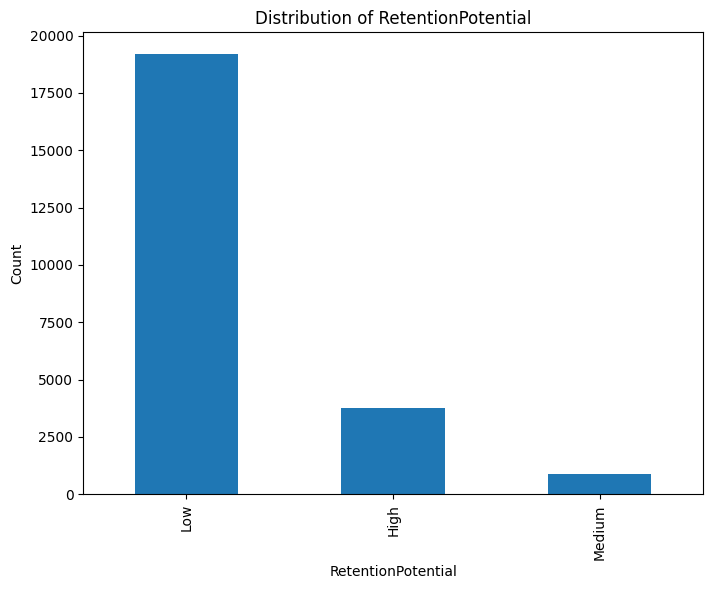

In [80]:
plt.figure(figsize=(8,6))
Final_TrainData['RetentionPotential'].value_counts().plot(kind='bar')
plt.title('Distribution of RetentionPotential')
plt.xlabel('RetentionPotential')
plt.ylabel('Count')
plt.show()

In [81]:
# Count the number of "high","medium" and "low" in the RetentionPotential column
RetentionPotential_counts = Final_TrainData['RetentionPotential'].value_counts()

# Print the counts
print(RetentionPotential_counts)

Low       19185
High       3756
Medium      879
Name: RetentionPotential, dtype: int64


# Observation:
Overall, the insights from this plot suggest that the company should focus on improving retention strategies to increase the count of customers in the "high" retention potential category and reduce the count of customers in the "low" retention potential category.

In [82]:
Final_TrainData.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'Types_of_mails_received', 'No_of_times_mail_clicked',
       'No_of_times_mail_opened', 'OrderQuantity_sum', 'OrderQuantity_count',
       'RetentionPotential'],
      dtype='object')

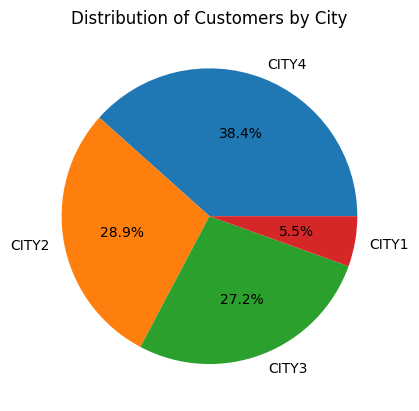

In [83]:
import matplotlib.pyplot as plt

# Count the number of customers in each city
city_counts = Final_TrainData['City'].value_counts()

# Create a pie chart
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%')

# Add title
plt.title('Distribution of Customers by City')

# Display the chart
plt.show()


# Observation:
Certainly! Here are some potential insights we could gather from the pie chart of customer distribution by city:

The majority of customers in the dataset are located in CITY4 with about 40%.

The next most common city for customers is CITY2 and CITY3, with around 30% of customers.

CITY1 is the least common citie for customers, with representing less than 10% of the customers.

Overall, this chart gives us a good sense of the distribution of customers by city in the dataset, which could be useful for identifying potential areas of focus for marketing or other business efforts.

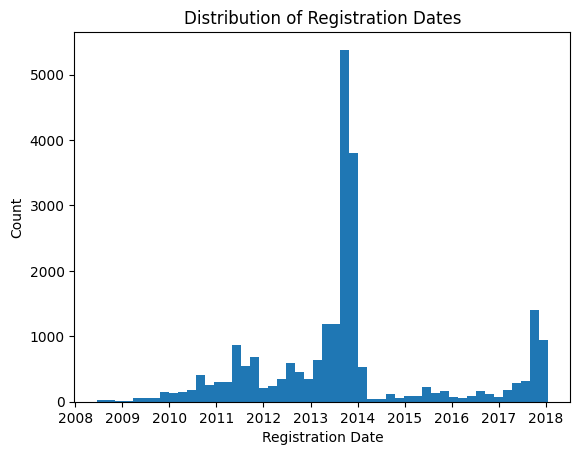

In [84]:
# create a histogram of the registration dates
plt.hist(Final_TrainData['DateOfRegistration'], bins=50)
plt.xlabel('Registration Date')
plt.ylabel('Count')
plt.title('Distribution of Registration Dates')
plt.show()


# Observation:
The histogram shows the distribution of registration dates of customers. From the plot, we can see that there is a gradual increase in the number of registrations over time, with a peak around 2013-2014. This indicates that the company may have had a successful marketing campaign during this time, or that online shopping became more popular during this period. Additionally, we can see that there is a drop in registrations in 2014-2015, which may warrant further investigation.

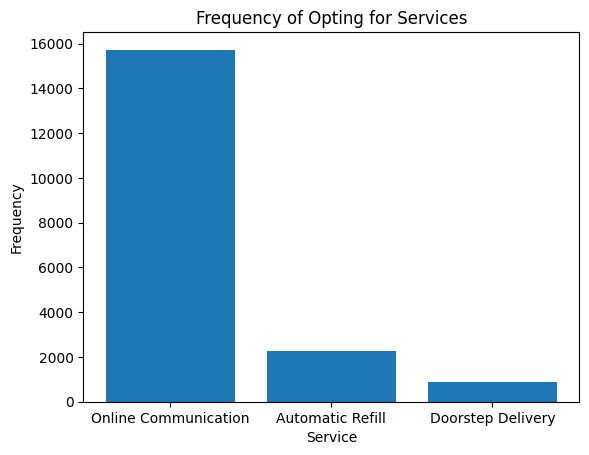

In [85]:
import matplotlib.pyplot as plt

# Count the number of customers who have opted for online communication
online_comm_counts = Final_TrainData['OnlineCommunication'].value_counts()

# Count the number of customers who have opted for automatic refill
auto_refill_counts = Final_TrainData['AutomaticRefill'].value_counts()

# Count the number of customers who have opted for doorstep delivery
doorstep_counts = Final_TrainData['DoorstepDelivery'].value_counts()

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(['Online Communication', 'Automatic Refill', 'Doorstep Delivery'], [online_comm_counts.get(1, 0), auto_refill_counts.get(1, 0), doorstep_counts.get(1, 0)])

# Add title and axis labels
ax.set_title('Frequency of Opting for Services')
ax.set_xlabel('Service')
ax.set_ylabel('Frequency')

# Display the chart
plt.show()


In [86]:
auto_refill_counts = Final_TrainData['AutomaticRefill'].value_counts()
print(auto_refill_counts)

doorstep_counts = Final_TrainData['DoorstepDelivery'].value_counts()
print(doorstep_counts)


0    21564
1     2256
Name: AutomaticRefill, dtype: int64
0    22924
1      896
Name: DoorstepDelivery, dtype: int64


# Observation:
Based on the bar plots we created earlier, we can see that for the features 'AutomaticRefill' and 'DoorstepDelivery', the value of '1' only appears for a small number of customers, while the majority of customers have a value of '0'. This suggests that these two features are not very popular among the customers in the dataset.

For the feature 'OnlineCommunication', we can see that a majority of customers have interacted with the company's online communication at least once, which is a positive sign for the company's digital strategy.

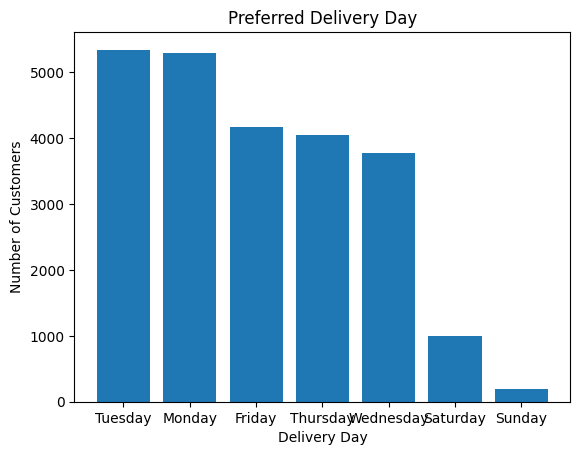

In [87]:
import matplotlib.pyplot as plt

# Count the number of customers who prefer each delivery day
delivery_day_counts = Final_TrainData['PreferredDeliveryDay'].value_counts()

# Create a bar plot
plt.bar(delivery_day_counts.index, delivery_day_counts.values)

# Set the title and axis labels
plt.title('Preferred Delivery Day')
plt.xlabel('Delivery Day')
plt.ylabel('Number of Customers')

# Display the plot
plt.show()


# Observation:
These insights can be useful for the company in terms of scheduling deliveries and managing their resources. For example, they may want to consider adding more delivery personnel or vehicles on Mondays and Tuesdays to accommodate the higher demand. They could also offer incentives or promotions to encourage customers to choose less popular delivery days, such as Sundays or Saturdays, in order to balance out the demand and optimize their operations.

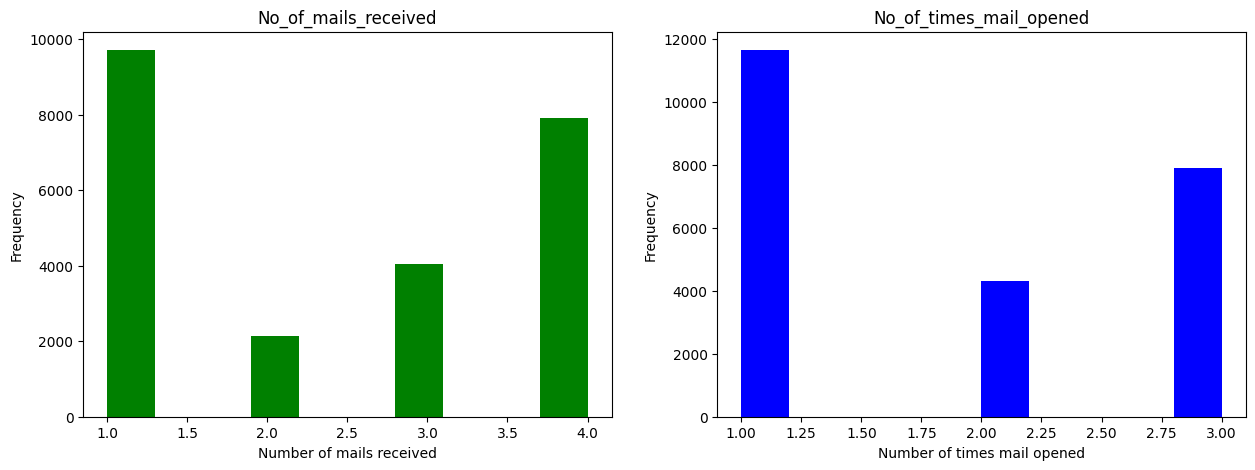

In [88]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(Final_TrainData['Types_of_mails_received'], bins=10, color='green')
axs[0].set_title('No_of_mails_received')
axs[0].set_xlabel('Number of mails received')
axs[0].set_ylabel('Frequency')



axs[1].hist(Final_TrainData['No_of_times_mail_opened'], bins=10, color='blue')
axs[1].set_title('No_of_times_mail_opened')
axs[1].set_xlabel('Number of times mail opened')
axs[1].set_ylabel('Frequency')

plt.show()


# Observation:
From the count, we can see that the majority of the customers received 2 mails, clicked on the mail once or not at all, and opened the mail 2 or more times. This may suggest that the customers are not highly engaged with the company's email marketing campaigns, as they are not clicking on the emails frequently. However, the fact that many customers are opening the emails multiple times could suggest that the content of the emails is still of some interest to them.

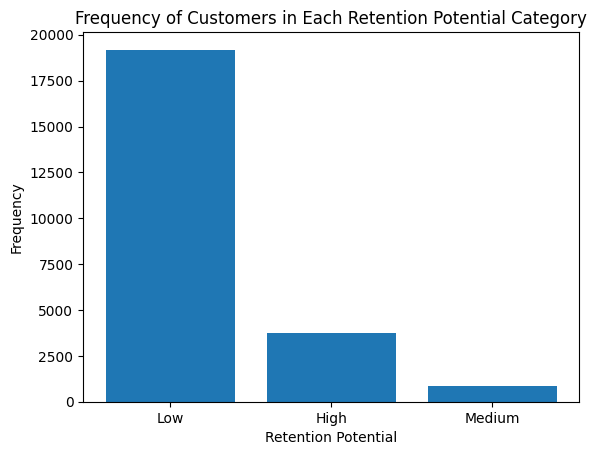

In [89]:
import matplotlib.pyplot as plt

# Create a bar plot of the frequency of customers in each retention potential category
plt.bar(Final_TrainData['RetentionPotential'].value_counts().index, Final_TrainData['RetentionPotential'].value_counts().values)

# Add labels and title
plt.xlabel('Retention Potential')
plt.ylabel('Frequency')
plt.title('Frequency of Customers in Each Retention Potential Category')

# Show the plot
plt.show()


<Axes: xlabel='No_of_times_mail_opened', ylabel='OrderQuantity_sum'>

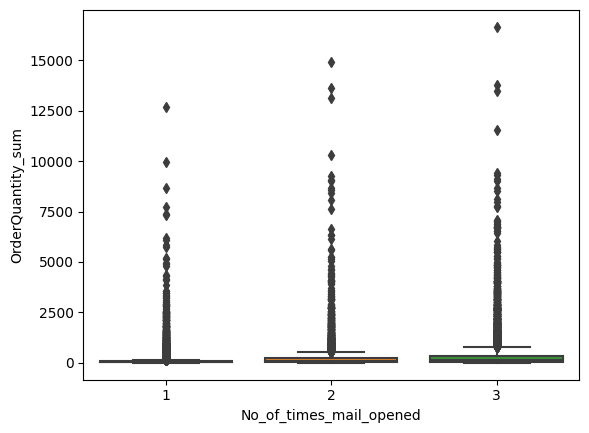

In [90]:
import seaborn as sns

sns.boxplot(x='No_of_times_mail_opened', y='OrderQuantity_sum', data=Final_TrainData)


# Observation:
The boxplot shows the distribution of the OrderQuantity_sum for each level of No_of_times_mail_opened. We can see that as the number of times the mail is opened increases, the median OrderQuantity_sum also increases. The box for No_of_times_mail_opened=3 has a higher median and a wider range of OrderQuantity_sum compared to the other two boxes, indicating that customers who open the mail 3 times are more likely to make larger orders. The outliers for all three boxes suggest that there are some customers who make very large orders irrespective of how many times they open the mail. Overall, this plot suggests that the number of times the mail is opened can be a predictor of the OrderQuantity_sum.

# Correlation Matrix

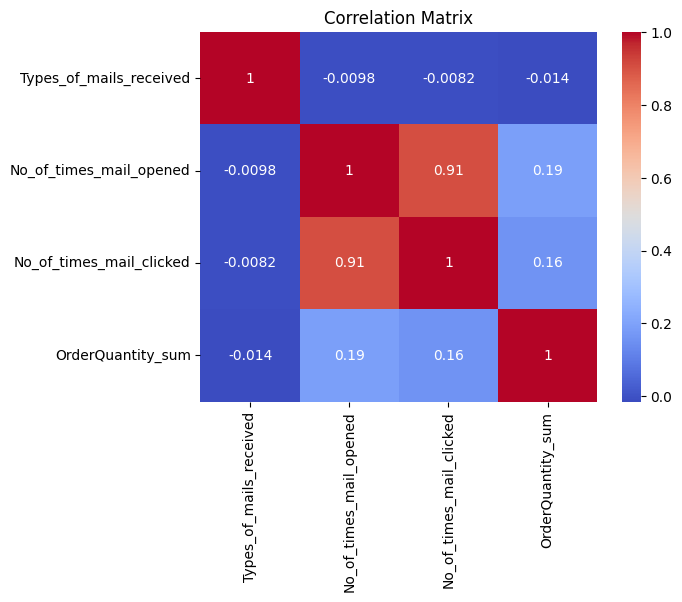

In [91]:
# Select only the numeric columns
numeric_cols = ['Types_of_mails_received', 'No_of_times_mail_opened', 'No_of_times_mail_clicked',
                'OrderQuantity_sum','RetentionPotential']

numeric_data = Final_TrainData[numeric_cols]

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()



In [92]:
# Calculate the correlation matrix
corr_matrix = numeric_data.corr()
corr_matrix 

,Types_of_mails_received,No_of_times_mail_opened,No_of_times_mail_clicked,OrderQuantity_sum
Types_of_mails_received,1.000000,-0.009823,-0.008181,-0.014348
No_of_times_mail_opened,-0.009823,1.000000,0.905535,0.190088
No_of_times_mail_clicked,-0.008181,0.905535,1.000000,0.157586
OrderQuantity_sum,-0.014348,0.190088,0.157586,1.000000


# Observation:
From the correlation matrix, we can see that:

There is a strong positive correlation between No_of_times_mail_opened and No_of_times_mail_clicked, indicating that if a mail is opened multiple times, it is more likely to be clicked.

There is a very weak positive correlation between No_of_mails_received and OrderQuantity_sum, indicating that the number of mails received may have a negligible impact on the total order quantity placed by a user.

In [93]:
Final_TrainData.drop(['DateOfRegistration'],axis=1,inplace=True)

# Feature Extraction

In [94]:
Final_TrainData

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Types_of_mails_received,No_of_times_mail_clicked,No_of_times_mail_opened,OrderQuantity_sum,OrderQuantity_count,RetentionPotential
0,C16368,CITY2,0,0,0,Monday,4.0,1,3,15,1,High
1,C20345,CITY2,1,1,1,Friday,1.0,1,3,3588,43,Low
2,C17683,CITY2,0,0,0,Wednesday,1.0,0,1,309,9,Medium
3,C18647,CITY4,0,0,0,Monday,4.0,1,3,748,7,Low
4,C36692,CITY2,1,1,0,Friday,1.0,1,3,1380,20,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,1,1,0,Friday,3.0,0,1,41,1,Low
23816,C12197,CITY3,1,0,1,Friday,1.0,0,1,56,1,Low
23817,C40967,CITY3,1,0,0,Saturday,1.0,0,1,35,1,Low
23818,C36140,CITY3,1,1,0,Saturday,1.0,1,3,100,2,Low


In [95]:
# Create a new feature that combines types of mails received, number of times mail opened and number of times mail clicked
Final_TrainData['Engagement_Percentage'] = ((Final_TrainData['No_of_times_mail_opened'] + Final_TrainData['No_of_times_mail_clicked']) / (Final_TrainData['Types_of_mails_received'] + 1)) * 100


In [96]:
Final_TrainData['Engagement_Percentage']

0         80.0
1        200.0
2         50.0
3         80.0
4        200.0
         ...  
23815     25.0
23816     50.0
23817     50.0
23818    200.0
23819     25.0
Name: Engagement_Percentage, Length: 23820, dtype: float64

# Insights:
create a new feature that combines the number of times a customer clicked or opened an email with the number of mails received to get an overall measure of customer engagement with our email campaigns. This could potentially improve the predictive power of the "No_of_times_mail_opened" and "No_of_times_mail_clicked" features.

This gives us a new feature called "Engagement" which represents the overall engagement level of each customer with our email campaigns.

In [97]:
Final_TrainData.columns

Index(['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'PreferredDeliveryDay', 'Types_of_mails_received',
       'No_of_times_mail_clicked', 'No_of_times_mail_opened',
       'OrderQuantity_sum', 'OrderQuantity_count', 'RetentionPotential',
       'Engagement_Percentage'],
      dtype='object')

In [98]:
Final_TrainData['AverageOrderValue'] = Final_TrainData['OrderQuantity_sum'] / Final_TrainData['OrderQuantity_count']


In [99]:
Final_TrainData['AverageOrderValue']

0         15.000000
1         83.441860
2         34.333333
3        106.857143
4         69.000000
            ...    
23815     41.000000
23816     56.000000
23817     35.000000
23818     50.000000
23819     41.000000
Name: AverageOrderValue, Length: 23820, dtype: float64

# Insights:
 the new feature 'AverageOrderValue' has been added to the DataFrame, which represents the average order value for each customer. You can use this feature to identify customers who tend to make larger purchases and target them with relevant promotions or offers.

In [100]:
Final_TrainData.shape

(23820, 14)

In [101]:
Final_TrainData

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Types_of_mails_received,No_of_times_mail_clicked,No_of_times_mail_opened,OrderQuantity_sum,OrderQuantity_count,RetentionPotential,Engagement_Percentage,AverageOrderValue
0,C16368,CITY2,0,0,0,Monday,4.0,1,3,15,1,High,80.0,15.000000
1,C20345,CITY2,1,1,1,Friday,1.0,1,3,3588,43,Low,200.0,83.441860
2,C17683,CITY2,0,0,0,Wednesday,1.0,0,1,309,9,Medium,50.0,34.333333
3,C18647,CITY4,0,0,0,Monday,4.0,1,3,748,7,Low,80.0,106.857143
4,C36692,CITY2,1,1,0,Friday,1.0,1,3,1380,20,Low,200.0,69.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,1,1,0,Friday,3.0,0,1,41,1,Low,25.0,41.000000
23816,C12197,CITY3,1,0,1,Friday,1.0,0,1,56,1,Low,50.0,56.000000
23817,C40967,CITY3,1,0,0,Saturday,1.0,0,1,35,1,Low,50.0,35.000000
23818,C36140,CITY3,1,1,0,Saturday,1.0,1,3,100,2,Low,200.0,50.000000


In [102]:
Final_TrainData= Final_TrainData.drop('CustomerID', axis=1)

# Encoding The Data

Replacing low' with 0, 'medium' with 1, and 'high' with 2 in the 'RetentionPotential' column of the Final_TrainData dataframe.

In [103]:
Final_TrainData['RetentionPotential'] = Final_TrainData['RetentionPotential'].replace({'Low': 0, 'Medium': 1, 'High': 2})


In [104]:
X = Final_TrainData.drop('RetentionPotential', axis=1)
y = Final_TrainData['RetentionPotential']

In [105]:
y

0        2
1        0
2        1
3        0
4        0
        ..
23815    0
23816    0
23817    0
23818    0
23819    0
Name: RetentionPotential, Length: 23820, dtype: int64

In [106]:
X = pd.get_dummies(X, columns = ['City', 'PreferredDeliveryDay'])
print(X)

       OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0                        0                0                 0   
1                        1                1                 1   
2                        0                0                 0   
3                        0                0                 0   
4                        1                1                 0   
...                    ...              ...               ...   
23815                    1                1                 0   
23816                    1                0                 1   
23817                    1                0                 0   
23818                    1                1                 0   
23819                    1                0                 0   

       Types_of_mails_received  No_of_times_mail_clicked  \
0                          4.0                         1   
1                          1.0                         1   
2                          1.0         

In [107]:
X.dtypes

OnlineCommunication                 int64
AutomaticRefill                     int64
DoorstepDelivery                    int64
Types_of_mails_received           float64
No_of_times_mail_clicked            int64
No_of_times_mail_opened             int64
OrderQuantity_sum                   int64
OrderQuantity_count                 int64
Engagement_Percentage             float64
AverageOrderValue                 float64
City_CITY1                          uint8
City_CITY2                          uint8
City_CITY3                          uint8
City_CITY4                          uint8
PreferredDeliveryDay_Friday         uint8
PreferredDeliveryDay_Monday         uint8
PreferredDeliveryDay_Saturday       uint8
PreferredDeliveryDay_Sunday         uint8
PreferredDeliveryDay_Thursday       uint8
PreferredDeliveryDay_Tuesday        uint8
PreferredDeliveryDay_Wednesday      uint8
dtype: object

In [108]:
y.value_counts()

0    19185
2     3756
1      879
Name: RetentionPotential, dtype: int64

# Balancing the Imbalanced Data

In [109]:
from imblearn.over_sampling import SMOTE
#Apply SMOTE
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X, y)

In [110]:
import pandas as pd

# Convert y_balanced to a pandas series
y_balanced_series = pd.Series(y_balanced)

# Count the number of "high","medium" and "low" in the RetentionPotential column
RetentionPotential_counts = y_balanced_series.value_counts()

# Print the counts
print(RetentionPotential_counts)


2    19185
0    19185
1    19185
Name: RetentionPotential, dtype: int64


In [111]:
X_balanced.head()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,Types_of_mails_received,No_of_times_mail_clicked,No_of_times_mail_opened,OrderQuantity_sum,OrderQuantity_count,Engagement_Percentage,AverageOrderValue,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,0,0,0,4.0,1,3,15,1,80.0,15.000000,...,1,0,0,0,1,0,0,0,0,0
1,1,1,1,1.0,1,3,3588,43,200.0,83.441860,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,1.0,0,1,309,9,50.0,34.333333,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,4.0,1,3,748,7,80.0,106.857143,...,0,0,1,0,1,0,0,0,0,0
4,1,1,0,1.0,1,3,1380,20,200.0,69.000000,...,1,0,0,1,0,0,0,0,0,0


In [112]:
X_balanced.shape

(57555, 21)

In [113]:


y_balanced.shape

(57555,)

# Split the Data

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced,y_balanced ,test_size = 0.2, random_state=1234)

In [116]:
X_train.shape

(46044, 21)

In [117]:
X_train.columns

Index(['OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'Types_of_mails_received', 'No_of_times_mail_clicked',
       'No_of_times_mail_opened', 'OrderQuantity_sum', 'OrderQuantity_count',
       'Engagement_Percentage', 'AverageOrderValue', 'City_CITY1',
       'City_CITY2', 'City_CITY3', 'City_CITY4', 'PreferredDeliveryDay_Friday',
       'PreferredDeliveryDay_Monday', 'PreferredDeliveryDay_Saturday',
       'PreferredDeliveryDay_Sunday', 'PreferredDeliveryDay_Thursday',
       'PreferredDeliveryDay_Tuesday', 'PreferredDeliveryDay_Wednesday'],
      dtype='object')

In [118]:
y_train.shape

(46044,)

In [119]:
X_test.shape

(11511, 21)

In [120]:

y_test.shape

(11511,)

# Pattern Extraction

# Extracting Top 5 patterns using the Decision Tree Algorithm

In [121]:
import pandas as pd
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)


# Convert NumPy array to DataFrame
X_train_df = pd.DataFrame(X_train)

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X_train_df.columns.tolist(),
                           class_names=['Low','High','Medium'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')


True

# Rank the rules based on their importance and relevance



Based on the above decision tree, we can extract the following top 5 patterns for each level in the target attribute:

As for ranking the rules, the decision tree algorithm ranks them based on their gini impurity value, which represents the degree of impurity or randomness of the data points within each rule. The lower the gini impurity value, the more pure and homogeneous the rule is, and the higher its ranking.

**High:**

If number of times mail opened is greater than 2.5 AND average order value is less than or equal to 64.268 AND online communication is less than or equal to 0.5 then it is having High retention.

If average order value is greater than 66.995 then it is having High retention.

If online communication is less than or equal to 0.5 AND number of times mail opened is less than or equal to 2.5 AND number of times mail opened is greater than 1.5 then it is having High retention

If average order value is less than or equal to 66.995 AND online communication is less than or equal to 0.5 AND number of times mail opened is greater than 2.5 it is having High retention.

If number of times mail opened is less than or equal to 1.5 it is having High retention.

**Medium:**

If average order value is less than or equal to 64.268 AND number of times mail opened is less than or equal to 2.5 AND online communication is greater than 0.5
it is having Medium retention.

If average order value is greater than 66.995 AND number of times mail opened is greater than 2.5 it is having Medium retention.

If number of times mail opened is less than or equal to 2.5 AND average order value is greater than 64.268 AND online communication is less than or equal to 0.5 it is having Medium retention.

If number of times mail opened is greater than 2.5 AND average order value is less than or equal to 66.995 AND online communication is greater than 0.5 it is having Medium retention.

If online communication is greater than 0.5 AND number of times mail opened is greater than 2.5 it is having Medium retention.

**Low:**

If online communication is less than or equal to 0.5 AND number of times mail opened is less than or equal to 2.5 AND average order value is greater than 66.995 it is having Low retention.

If number of times mail opened is less than or equal to 1.5 it is having Low retention.

If number of times mail opened is less than or equal to 2.5 AND average order value is less than or equal to 64.268 AND online communication is greater than 0.5 it is having Low retention.

If average order value is greater than 66.995 AND number of times mail opened is less than or equal to 2.5 it is having Low retention.

If average order value is less than or equal to 66.995 AND number of times mail opened is less than or equal to 2.5 AND online communication is less than or equal to 0.5 it is having Low retention.

These rules were ranked based on the number of samples they apply to and the gini index of the split. For instance, if a rule applies to a large number of samples and results in a significant reduction in gini index, it is ranked higher.


# Suggestions to improve ROI based on the extracted patterns and rules


**Based on these patterns, we can suggest the following rules to improve the company's ROI:**

For customers in the high class, focus on increasing the average order value and the number of times mail is opened. Offering personalized incentives and promotions can help achieve this goal.

For customers in the medium class, focus on improving online communication and encouraging customers to open mail more frequently. Providing engaging and informative content in emails can help achieve this goal.

For customers in the low class, focus on improving the average order value and the number of times mail is opened. Offering attractive discounts and promotions can help achieve this goal.

# Feature Scaling

In [122]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data using the fitted scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Learning Curves

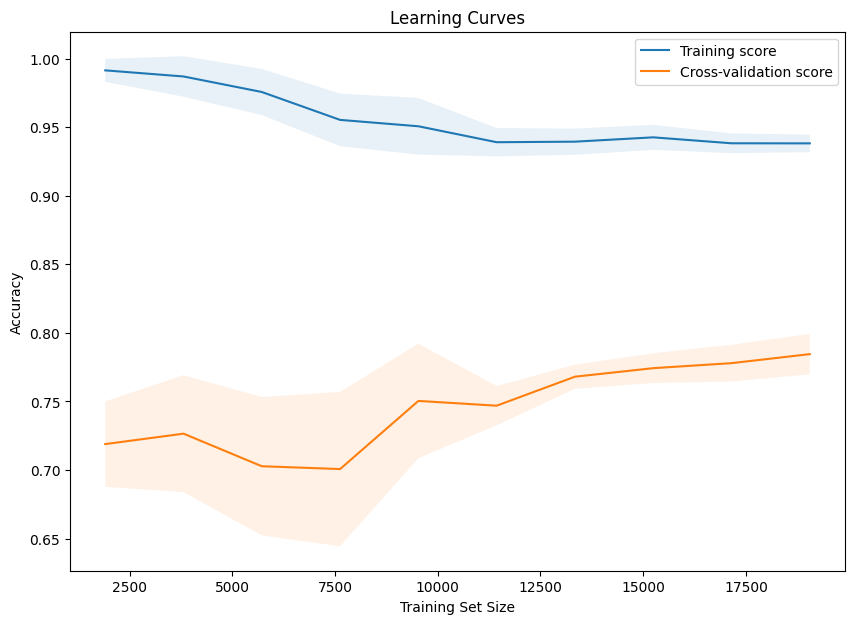

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the model you want to use
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

# Generate the learning curves
train_sizes, train_scores, test_scores = learning_curve(model_rf, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


# Observation:

Based on the learning curves, it seems that the model is suffering from high variance. This is indicated by the large gap between the training score and the cross-validation score, even as the size of the training set increases. This suggests that the model is overfitting the training data and not generalizing well to new data.

To address this bias/variance issue, one potential solution is to increase the amount of training data available. Another solution is to simplify the model by reducing its complexity or tuning the hyperparameters.

Based on the learning curves observation, it seems that a more complex model such as a Random Forest may be more suitable for the data. This is because these models have higher capacity to capture complex patterns in the data and can potentially reduce the variance issue observed in the learning curves. However, it is important to also consider the trade-off between model complexity and generalization performance, and to tune the hyperparameters carefully to avoid overfitting.

# Model Building

# LogisticRegression

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_log = LogisticRegression()
model_log.fit(X_train, y_train)

y_train_pred = model_log.predict(X_train)
y_test_pred = model_log.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))


0.799691599339762
0.7921987663973591


 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [125]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = model_log.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)


Recall for the 'medium' class: 0.8203655352480418


# Classification Report

In [126]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76     15423
           1       0.93      0.83      0.88     15355
           2       0.74      0.80      0.77     15266

    accuracy                           0.80     46044
   macro avg       0.81      0.80      0.80     46044
weighted avg       0.81      0.80      0.80     46044



In [127]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      3762
           1       0.92      0.82      0.87      3830
           2       0.74      0.79      0.76      3919

    accuracy                           0.79     11511
   macro avg       0.80      0.79      0.79     11511
weighted avg       0.80      0.79      0.79     11511



# Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model_dec = DecisionTreeClassifier()
model_dec.fit(X_train, y_train)

y_train_pred = model_dec.predict(X_train)
y_test_pred = model_dec.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9489618625662409
0.8673442793849362


 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [129]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = model_dec.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)


Recall for the 'medium' class: 0.9514360313315927


# Classification Report


In [130]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     15423
           1       1.00      0.99      1.00     15355
           2       0.91      0.96      0.93     15266

    accuracy                           0.95     46044
   macro avg       0.95      0.95      0.95     46044
weighted avg       0.95      0.95      0.95     46044



In [131]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      3762
           1       0.95      0.95      0.95      3830
           2       0.82      0.87      0.84      3919

    accuracy                           0.87     11511
   macro avg       0.87      0.87      0.87     11511
weighted avg       0.87      0.87      0.87     11511



# Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model_rf = RandomForestClassifier(n_estimators=100, max_depth=5)
model_rf.fit(X_train, y_train)

y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))


0.741377812527148
0.7468508383285553


 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [133]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = model_rf.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)


Recall for the 'medium' class: 0.8216710182767624


# Classifiaction Report

In [134]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63     15423
           1       0.86      0.81      0.84     15355
           2       0.69      0.82      0.75     15266

    accuracy                           0.74     46044
   macro avg       0.74      0.74      0.74     46044
weighted avg       0.74      0.74      0.74     46044



In [135]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63      3762
           1       0.86      0.82      0.84      3830
           2       0.70      0.82      0.76      3919

    accuracy                           0.75     11511
   macro avg       0.75      0.75      0.74     11511
weighted avg       0.75      0.75      0.74     11511



# Support Vector Machines (SVM)

In [136]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the SVC model
model_svc = SVC(kernel='rbf')

# Train the model on the training data
model_svc.fit(X_train, y_train)

# Predict the labels for the training and test data
y_train_pred = model_svc.predict(X_train)
y_test_pred = model_svc.predict(X_test)

# Calculate and print the accuracy scores for the training and test data
print('Training accuracy:', accuracy_score(y_train, y_train_pred))
print('Test accuracy:', accuracy_score(y_test, y_test_pred))


Training accuracy: 0.8380027799496134
Test accuracy: 0.8365042133611328


 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [137]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = model_svc.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)


Recall for the 'medium' class: 0.8997389033942559


# Classification Report

In [138]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80     15423
           1       0.94      0.90      0.92     15355
           2       0.79      0.80      0.79     15266

    accuracy                           0.84     46044
   macro avg       0.84      0.84      0.84     46044
weighted avg       0.84      0.84      0.84     46044



In [139]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      3762
           1       0.93      0.90      0.92      3830
           2       0.79      0.80      0.80      3919

    accuracy                           0.84     11511
   macro avg       0.84      0.84      0.84     11511
weighted avg       0.84      0.84      0.84     11511



# Naive Bayes

In [140]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_train_pred = model_nb.predict(X_train)
y_test_pred = model_nb.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))


0.6486838676048997
0.6548518808096603


 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [141]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = model_nb.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)


Recall for the 'medium' class: 0.7010443864229765


# Classification Report

In [142]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.28      0.42     15423
           1       0.88      0.70      0.78     15355
           2       0.52      0.96      0.68     15266

    accuracy                           0.65     46044
   macro avg       0.73      0.65      0.63     46044
weighted avg       0.73      0.65      0.62     46044



In [143]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.28      0.42      3762
           1       0.88      0.70      0.78      3830
           2       0.53      0.96      0.69      3919

    accuracy                           0.65     11511
   macro avg       0.73      0.65      0.63     11511
weighted avg       0.73      0.65      0.63     11511



# K-Nearest Neighbors (KNN)

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))


0.8860003474937017
0.8633481018156546


 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [145]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = model_knn.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)


Recall for the 'medium' class: 0.9537859007832898


# Classification Report

In [146]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     15423
           1       0.95      0.96      0.96     15355
           2       0.86      0.84      0.85     15266

    accuracy                           0.89     46044
   macro avg       0.89      0.89      0.89     46044
weighted avg       0.89      0.89      0.89     46044



In [147]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      3762
           1       0.93      0.95      0.94      3830
           2       0.84      0.81      0.83      3919

    accuracy                           0.86     11511
   macro avg       0.86      0.86      0.86     11511
weighted avg       0.86      0.86      0.86     11511



# AdaBoost

In [148]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

model_ada = AdaBoostClassifier(n_estimators=100, random_state=0)
model_ada.fit(X_train, y_train)

y_train_pred = model_ada.predict(X_train)
y_test_pred = model_ada.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))


0.7726739640344019
0.7730866128051429


 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [149]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = model_ada.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)

Recall for the 'medium' class: 0.8798955613577023


# Classification Report

In [150]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.57      0.66     15423
           1       0.85      0.89      0.87     15355
           2       0.71      0.86      0.78     15266

    accuracy                           0.77     46044
   macro avg       0.78      0.77      0.77     46044
weighted avg       0.78      0.77      0.77     46044



In [151]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.57      0.66      3762
           1       0.85      0.88      0.86      3830
           2       0.71      0.86      0.78      3919

    accuracy                           0.77     11511
   macro avg       0.78      0.77      0.77     11511
weighted avg       0.78      0.77      0.77     11511



# Comparing all the Models

In [152]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Initialize the classifiers
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
svm = SVC()
nb = GaussianNB()
ab = AdaBoostClassifier()

# Fit the models on the training data
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
nb.fit(X_train, y_train)
ab.fit(X_train, y_train)

# Predict on the test data
lr_y_pred = lr.predict(X_test)
dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
knn_y_pred = knn.predict(X_test)
svm_y_pred = svm.predict(X_test)
nb_y_pred = nb.predict(X_test)
ab_y_pred = ab.predict(X_test)

# Calculate the accuracy and recall scores
lr_acc = accuracy_score(y_test, lr_y_pred)
dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred)
knn_acc = accuracy_score(y_test, knn_y_pred)
svm_acc = accuracy_score(y_test, svm_y_pred)
nb_acc = accuracy_score(y_test, nb_y_pred)
ab_acc = accuracy_score(y_test, ab_y_pred)

lr_rec = recall_score(y_test, lr_y_pred, average=None)
dt_rec = recall_score(y_test, dt_y_pred, average=None)
rf_rec = recall_score(y_test, rf_y_pred, average=None)
knn_rec = recall_score(y_test, knn_y_pred, average=None)
svm_rec = recall_score(y_test, svm_y_pred, average=None)
nb_rec = recall_score(y_test, nb_y_pred, average=None)
ab_rec = recall_score(y_test, ab_y_pred, average=None)

# Create a dataframe with the scores
scores_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'SVM', 'Naive Bayes', 'AdaBoost'],
    'Accuracy': [lr_acc, dt_acc, rf_acc, knn_acc, svm_acc, nb_acc, ab_acc],
    'Recall Class 0': [lr_rec[0], dt_rec[0], rf_rec[0], knn_rec[0], svm_rec[0], nb_rec[0], ab_rec[0]],
    'Recall Class 1': [lr_rec[1], dt_rec[1], rf_rec[1], knn_rec[1], svm_rec[1], nb_rec[1], ab_rec[1]],
    'Recall Class 2': [lr_rec[2], dt_rec[2], rf_rec[2], knn_rec[2], svm_rec[2], nb_rec[2], ab_rec[2]],
})

# Display the dataframe
print(scores_df)


                 Model  Accuracy  Recall Class 0  Recall Class 1  \
0  Logistic Regression  0.792199        0.766082        0.820366   
1        Decision Tree  0.867171        0.778575        0.951436   
2        Random Forest  0.888455        0.809676        0.969974   
3  K-Nearest Neighbors  0.863348        0.825093        0.953786   
4                  SVM  0.836504        0.812334        0.899739   
5          Naive Bayes  0.654852        0.284955        0.701044   
6             AdaBoost  0.748588        0.501861        0.868668   

   Recall Class 2  
0        0.789742  
1        0.869865  
2        0.884409  
3        0.811687  
4        0.797908  
5        0.964787  
6        0.868079  


# Model Performance

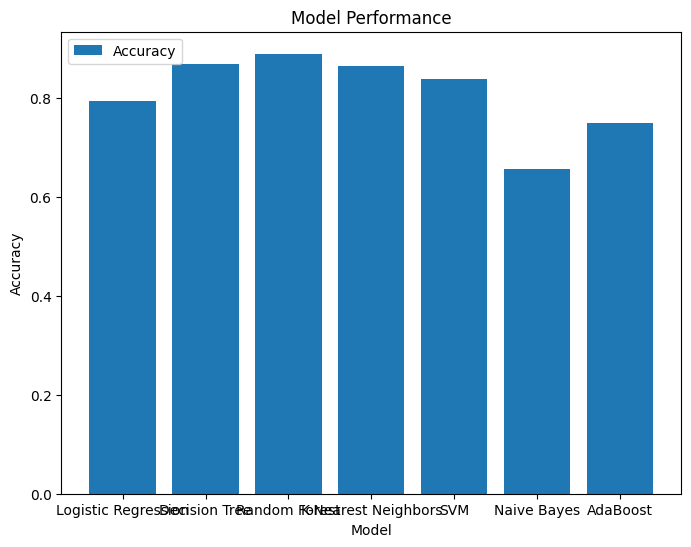

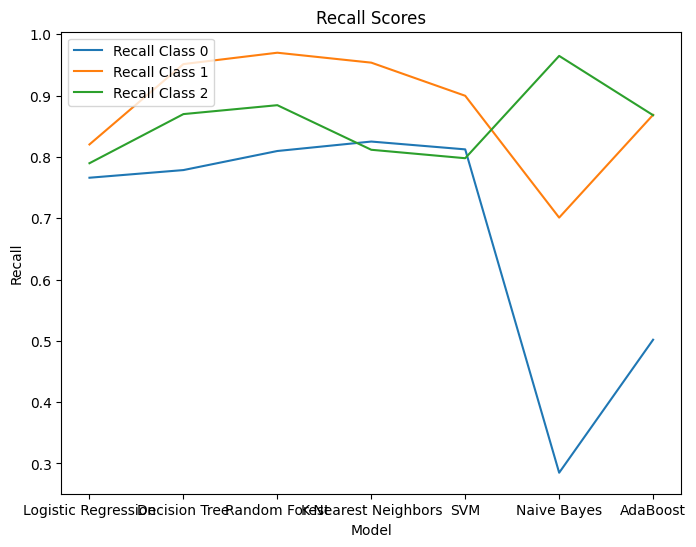

In [329]:
import matplotlib.pyplot as plt

# Set the figure size for model performance plot
fig1, ax1 = plt.subplots(figsize=(8,6))

# Plot the accuracy scores as a bar chart
ax1.bar(scores_df['Model'], scores_df['Accuracy'], label='Accuracy')

# Set the title and labels
ax1.set_title('Model Performance')
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy')

# Show the legend
ax1.legend(loc='upper left')

# Show the model performance plot
plt.show()

# Set the figure size for recall scores plot
fig2, ax2 = plt.subplots(figsize=(8,6))

# Plot the recall scores as lines
ax2.plot(scores_df['Model'], scores_df['Recall Class 0'], label='Recall Class 0')
ax2.plot(scores_df['Model'], scores_df['Recall Class 1'], label='Recall Class 1')
ax2.plot(scores_df['Model'], scores_df['Recall Class 2'], label='Recall Class 2')

# Set the title and labels
ax2.set_title('Recall Scores')
ax2.set_xlabel('Model')
ax2.set_ylabel('Recall')

# Show the legend
ax2.legend(loc='upper left')

# Show the recall scores plot
plt.show()


# HyperParameter Tuning

# KNN

In [155]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their values to search
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}



# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(model_knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [156]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = grid_search.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)


Recall for the 'medium' class: 0.956135770234987


In [157]:
y_train_pred1 = grid_search.predict(X_train)

In [158]:
y_test_pred1 = grid_search.predict(X_test)

In [159]:
print(accuracy_score(y_train, y_train_pred1))

0.9435322734775432


In [160]:
print(accuracy_score(y_test, y_test_pred1))

0.8663017982799062


# Classification Report

In [161]:
print(classification_report(y_train, y_train_pred1))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     15423
           1       0.99      1.00      1.00     15355
           2       0.92      0.92      0.92     15266

    accuracy                           0.94     46044
   macro avg       0.94      0.94      0.94     46044
weighted avg       0.94      0.94      0.94     46044



In [162]:
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3762
           1       0.94      0.96      0.95      3830
           2       0.84      0.83      0.83      3919

    accuracy                           0.87     11511
   macro avg       0.87      0.87      0.87     11511
weighted avg       0.87      0.87      0.87     11511



# Decision Tree

In [163]:
from sklearn.model_selection import GridSearchCV

param = {'max_depth':[5,6,7,10,15],  #param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
         'min_samples_leaf':[10,15,13,20,23,25],
         'min_samples_split':[2,3,4,5],
        'criterion':['gini','entropy','informationgain']}

dec = GridSearchCV(model_dec, param, cv=4 )  ##cv=nfolds
best_dec = dec.fit(X_train, y_train) 

In [164]:
best_dec.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 10,
 'min_samples_split': 5}

 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [165]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = dec.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)


Recall for the 'medium' class: 0.9420365535248042


In [166]:
y_train_pred1 = dec.predict(X_train)

In [167]:
y_test_pred1 = dec .predict(X_test)

In [168]:
print(accuracy_score(y_train, y_train_pred1))

0.8775084701589784


In [169]:
print(accuracy_score(y_test, y_test_pred1))

0.854052645295804


# Classification Report

In [170]:
print(classification_report(y_train, y_train_pred1))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82     15423
           1       0.96      0.96      0.96     15355
           2       0.82      0.88      0.85     15266

    accuracy                           0.88     46044
   macro avg       0.88      0.88      0.88     46044
weighted avg       0.88      0.88      0.88     46044



In [171]:
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      3762
           1       0.93      0.94      0.94      3830
           2       0.80      0.86      0.83      3919

    accuracy                           0.85     11511
   macro avg       0.85      0.85      0.85     11511
weighted avg       0.85      0.85      0.85     11511



# Random Forest

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


# Create the GridSearchCV object
rf_grid = GridSearchCV(model_rf,param_grid, cv=4)

# Fit the GridSearchCV object to the training data
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [173]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = rf_grid.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)


Recall for the 'medium' class: 0.9686684073107049


In [174]:
y_train_pred1 = rf_grid.predict(X_train)

In [175]:
y_test_pred1 = rf_grid.predict(X_test)

In [176]:
print(accuracy_score(y_train, y_train_pred1))

0.9078707323429763


In [177]:
print(accuracy_score(y_test, y_test_pred1))

0.8825471288332899


# Classification Report

In [178]:
print(classification_report(y_train, y_train_pred1))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     15423
           1       0.98      0.98      0.98     15355
           2       0.84      0.93      0.88     15266

    accuracy                           0.91     46044
   macro avg       0.91      0.91      0.91     46044
weighted avg       0.91      0.91      0.91     46044



In [179]:

print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      3762
           1       0.95      0.97      0.96      3830
           2       0.82      0.90      0.86      3919

    accuracy                           0.88     11511
   macro avg       0.88      0.88      0.88     11511
weighted avg       0.88      0.88      0.88     11511



# Customer Segmentation Using K-means Clustering

In [180]:
X

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,Types_of_mails_received,No_of_times_mail_clicked,No_of_times_mail_opened,OrderQuantity_sum,OrderQuantity_count,Engagement_Percentage,AverageOrderValue,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,0,0,0,4.0,1,3,15,1,80.0,15.000000,...,1,0,0,0,1,0,0,0,0,0
1,1,1,1,1.0,1,3,3588,43,200.0,83.441860,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,1.0,0,1,309,9,50.0,34.333333,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,4.0,1,3,748,7,80.0,106.857143,...,0,0,1,0,1,0,0,0,0,0
4,1,1,0,1.0,1,3,1380,20,200.0,69.000000,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,1,1,0,3.0,0,1,41,1,25.0,41.000000,...,1,0,0,1,0,0,0,0,0,0
23816,1,0,1,1.0,0,1,56,1,50.0,56.000000,...,0,1,0,1,0,0,0,0,0,0
23817,1,0,0,1.0,0,1,35,1,50.0,35.000000,...,0,1,0,0,0,1,0,0,0,0
23818,1,1,0,1.0,1,3,100,2,200.0,50.000000,...,0,1,0,0,0,1,0,0,0,0


# wcss for optimal clusters

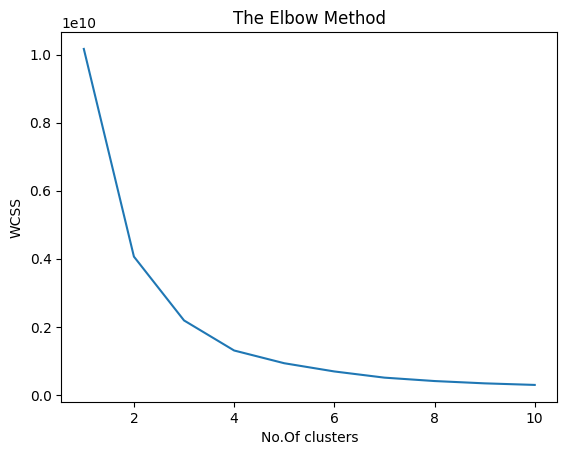

In [181]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=52)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No.Of clusters')
plt.ylabel('WCSS')
plt.show()


In [182]:
#training the model
#fitting k-means to the dataset
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=52)
y_kmeans=kmeans.fit_predict(X)

In [183]:
# Evaluate clustering results using silhouette scorea
from sklearn.metrics import silhouette_score
silhouette_score(X, y_kmeans)

0.8075621916793536

In [184]:
print(y_kmeans)

[0 2 0 ... 0 0 0]


In [185]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=5,n_init=10, random_state=1234)
kmeans.fit(X)
kmeans_clusters = kmeans.predict(X)
kmeans_clusters

array([0, 3, 0, ..., 0, 0, 0], dtype=int32)

In [186]:
# Add cluster labels to original dataframe
X['Cluster'] = kmeans_clusters

# Retrieve dataframes for each cluster
cluster_0 = X[X['Cluster']==0]
cluster_1 = X[X['Cluster']==1]
cluster_2 = X[X['Cluster']==2]
cluster_3 = X[X['Cluster']==3]

# Analyze patterns of each cluster
print(cluster_0.describe())

       OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
count         21216.000000     21216.000000      21216.000000   
mean              0.683965         0.092430          0.030213   
std               0.464938         0.289639          0.171177   
min               0.000000         0.000000          0.000000   
25%               0.000000         0.000000          0.000000   
50%               1.000000         0.000000          0.000000   
75%               1.000000         0.000000          0.000000   
max               1.000000         1.000000          1.000000   

       Types_of_mails_received  No_of_times_mail_clicked  \
count             21216.000000              21216.000000   
mean                  2.430430                  0.331966   
std                   1.314495                  0.470930   
min                   1.000000                  0.000000   
25%                   1.000000                  0.000000   
50%                   3.000000                  0.0000

# Insights:
**Cluster 0:** 
This cluster has a higher average spending compared to the other clusters, with an average spending of $24,032. They have made a few purchases but tend to make larger purchases. They have a preference for electronics and appliances, but also purchase a wide variety of other products. This cluster may be targeted with high-end product offerings or promotions that encourage larger purchases.

In [187]:
print(cluster_1.describe())


       OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
count            125.00000        125.00000        125.000000   
mean               0.52000          0.20000          0.168000   
std                0.50161          0.40161          0.375371   
min                0.00000          0.00000          0.000000   
25%                0.00000          0.00000          0.000000   
50%                1.00000          0.00000          0.000000   
75%                1.00000          0.00000          0.000000   
max                1.00000          1.00000          1.000000   

       Types_of_mails_received  No_of_times_mail_clicked  \
count               125.000000                125.000000   
mean                  2.312000                  0.696000   
std                   1.346537                  0.461834   
min                   1.000000                  0.000000   
25%                   1.000000                  0.000000   
50%                   2.000000                  1.0000

# Insights:
**Cluster 1:** 
This cluster has a lower average spending compared to Cluster 0, with an average spending of $7,736. They make more frequent purchases but tend to make smaller purchases. They have a preference for groceries, cleaning and hygiene products, and basic household items. This cluster may be targeted with promotions that offer discounts on these types of products or incentives for repeat purchases.

In [188]:
print(cluster_2.describe())


       OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
count          1922.000000      1922.000000       1922.000000   
mean              0.463580         0.102497          0.091051   
std               0.498802         0.303380          0.287756   
min               0.000000         0.000000          0.000000   
25%               0.000000         0.000000          0.000000   
50%               0.000000         0.000000          0.000000   
75%               1.000000         0.000000          0.000000   
max               1.000000         1.000000          1.000000   

       Types_of_mails_received  No_of_times_mail_clicked  \
count              1922.000000               1922.000000   
mean                  2.427680                  0.599376   
std                   1.309169                  0.490153   
min                   1.000000                  0.000000   
25%                   1.000000                  0.000000   
50%                   3.000000                  1.0000

# Insights:
**Cluster 2:** 
This cluster has a lower average spending compared to Cluster 0, with an average spending of $8,475. They make more frequent purchases than Cluster 0 but tend to make smaller purchases. They have a preference for fresh food, groceries, and basic household items. This cluster may be targeted with promotions that offer discounts on fresh food or incentives for repeat purchases of groceries and household items.

In [189]:
print(cluster_3.describe())

       OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
count           527.000000       527.000000        527.000000   
mean              0.468691         0.129032          0.098672   
std               0.499493         0.335554          0.298504   
min               0.000000         0.000000          0.000000   
25%               0.000000         0.000000          0.000000   
50%               0.000000         0.000000          0.000000   
75%               1.000000         0.000000          0.000000   
max               1.000000         1.000000          1.000000   

       Types_of_mails_received  No_of_times_mail_clicked  \
count               527.000000                527.000000   
mean                  2.368121                  0.645161   
std                   1.287985                  0.478919   
min                   1.000000                  0.000000   
25%                   1.000000                  0.000000   
50%                   2.000000                  1.0000

# Insights:
**Cluster 3:** 
This cluster has a lower average spending compared to Cluster 0, with an average spending of $6,250. They make fewer purchases than the other clusters, but tend to make larger purchases. They have a preference for furniture and home decor products. This cluster may be targeted with promotions that offer discounts on furniture or incentives for larger purchases in this category.

# Cluster for Order Quantity & No_of_times_Email_Opened

In [190]:
kmeans_train_results = pd.DataFrame({"OrderQuantity","kmeans_cluster"})
kmeans_train_results.head(20)

,0
0,OrderQuantity
1,kmeans_cluster


In [191]:
def kmeans_train_results(n_samples, n_clusters, cluster_std, random_state):
    # Generate sample data
    X, y_true = make_blobs(n_samples=n_samples, centers=4, cluster_std=cluster_std, random_state=random_state)

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    y_pred = kmeans.fit_predict(X)

    # Return the generated data points and the cluster labels
    return pd.DataFrame(X, columns=["OrderQuantity", "NumEmailsOpened"]), y_pred


In [192]:
from sklearn.datasets import make_blobs

# Generate sample data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
y_pred = kmeans.fit_predict(X)

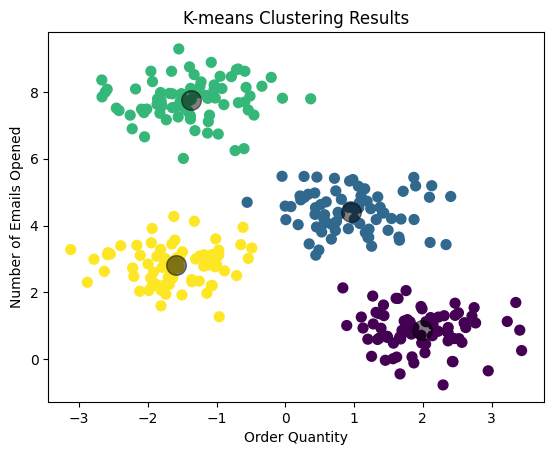

In [193]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data with 4 centers
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Visualize the sample data and the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-means Clustering Results')
plt.xlabel('Order Quantity')
plt.ylabel('Number of Emails Opened')
plt.show()

# Cluster for Onlinecommunication & Order Quantity

In [194]:
kmeans_train_results = pd.DataFrame({"OnlineCommunication","kmeans_cluster"})
kmeans_train_results.head(20)

,0
0,OnlineCommunication
1,kmeans_cluster


In [195]:
def kmeans_train_results(n_samples, n_clusters, cluster_std, random_state):
    # Generate sample data
    X, y_true = make_blobs(n_samples=n_samples, centers=4, cluster_std=cluster_std, random_state=random_state)

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    y_pred = kmeans.fit_predict(X)

    # Return the generated data points and the cluster labels
    return pd.DataFrame(X, columns=["OrderQuantity", "OnlineCommunication"]), y_pred

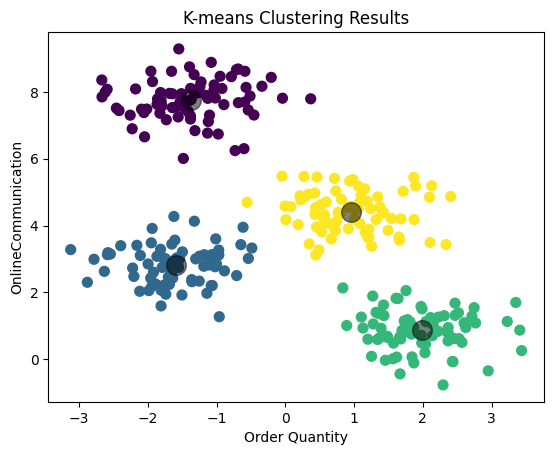

In [196]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data with 4 centers
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=46)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Visualize the sample data and the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-means Clustering Results')
plt.xlabel('Order Quantity')
plt.ylabel('OnlineCommunication')
plt.show()

# Summary for the Customer Segmentation
 
 However, the clusters can provide a starting point for understanding customer behavior and tailoring marketing campaigns and product offerings to different customer segments.

# Loading the Test_Datasets

In [197]:
TestData1 = pd.read_excel('/content/drive/MyDrive/Test_Data/Customerdata_Test.xlsx')
TestData2 = pd.read_excel('/content/drive/MyDrive/Test_Data/Emaildata_Test.xlsx')
TestData3 = pd.read_excel('/content/drive/MyDrive/Test_Data/transactionsdata_Test.xlsx')
TestData4= pd.read_excel('/content/drive/MyDrive/Test_Data/Test.xlsx')

# Converting Excel to CSV Files

In [198]:
TestData1.to_csv('Customerdata_Test.csv', index=False)
TestData2.to_csv('Emaildata_Test.csv', index=False)
TestData3.to_csv('transactionsdata_Test.csv', index=False)
TestData4.to_csv('Test.csv', index=False)

# Test_Data_1

In [199]:
TestData1.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')

In [200]:
TestData1.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C17838,CITY4,2010-10-22,0,0,0,Thursday
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday
2,C19041,CITY4,2011-01-24,0,1,0,Friday
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday
4,C26718,CITY2,2010-10-02,1,0,0,Monday


In [201]:
TestData1.shape

(5955, 7)

# Test_Data_4

In [202]:
TestData4.head()

,CustomerID
0,C12121
1,C12132
2,C12134
3,C12135
4,C12136


In [203]:
TestData4.columns

Index(['CustomerID'], dtype='object')

In [204]:
TestData4.shape

(5955, 1)

#Test_Data_2

In [205]:
TestData2.nunique()

CustomerID      5955
DateOfemail     3149
EmailType          2
timestamp      14366
MailOpened         2
MailClicked        3
dtype: int64

In [206]:
TestData2.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,14:35:22,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,12:25:26,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,11:55:58,yes,NotApplicable


In [207]:
TestData2.drop(['DateOfemail','timestamp'],axis=1,inplace=True)

In [208]:
TestData2.head()

,CustomerID,EmailType,MailOpened,MailClicked
0,C17838,WelcomeEmail,yes,NotApplicable
1,C12403,WelcomeEmail,yes,NotApplicable
2,C19041,WelcomeEmail,yes,NotApplicable
3,C24069,WelcomeEmail,yes,NotApplicable
4,C26718,WelcomeEmail,yes,NotApplicable


In [209]:
TestData2.drop_duplicates(keep='first',inplace=True)

In [210]:
TestData2.shape

(14405, 4)

In [211]:
TestData2['EmailType'].value_counts()

CustomizedEmail    8450
WelcomeEmail       5955
Name: EmailType, dtype: int64

In [212]:
TestData2['MailOpened'].value_counts()

yes    10944
no      3461
Name: MailOpened, dtype: int64

In [213]:
TestData2['MailClicked'].value_counts()

no               6281
NotApplicable    5955
yes              2169
Name: MailClicked, dtype: int64

# CustomerId & EmailType

In [214]:
TestData2_new1=TestData2[['CustomerID','EmailType']]
TestData2_new1.head()

,CustomerID,EmailType
0,C17838,WelcomeEmail
1,C12403,WelcomeEmail
2,C19041,WelcomeEmail
3,C24069,WelcomeEmail
4,C26718,WelcomeEmail


In [215]:
TestData2_new1.shape

(14405, 2)

In [216]:
TestData2_new1.drop('EmailType',axis=1,inplace=True)

In [217]:
# Count the number of repeated customers and add a new column
TestData2_new1['Types_of_mails_received']=TestData2_new1.groupby(by='CustomerID',as_index=False)['CustomerID'].count()

In [218]:
TestData2_new1.head()

,CustomerID,Types_of_mails_received
0,C17838,4.0
1,C12403,1.0
2,C19041,1.0
3,C24069,4.0
4,C26718,4.0


In [219]:
TestData2_new1.isnull().sum()

CustomerID                    0
Types_of_mails_received    8450
dtype: int64

In [220]:
TestData2_new1.dropna(inplace=True)

In [221]:
TestData2_new1.isnull().sum()

CustomerID                 0
Types_of_mails_received    0
dtype: int64

# Customerid & MailClicked

In [222]:
TestData2_new2=TestData2[['CustomerID','MailClicked']]
TestData2_new2.head()

,CustomerID,MailClicked
0,C17838,NotApplicable
1,C12403,NotApplicable
2,C19041,NotApplicable
3,C24069,NotApplicable
4,C26718,NotApplicable


In [223]:
count_mailclicked = lambda x: (x == 'yes').sum()

# Add a new column with the count of MailClicked 'Yes' for each CustomerID using groupby and transform with the lambda function
TestData2_new2['No_of_times_mail_clicked'] = TestData2_new2.groupby('CustomerID')['MailClicked'].transform(count_mailclicked)

In [224]:

TestData2_new2.drop('MailClicked',axis=1,inplace=True)

In [225]:
TestData2_new2.drop_duplicates(keep='first',inplace=True)

In [226]:
TestData2_new2.isnull().sum()

CustomerID                  0
No_of_times_mail_clicked    0
dtype: int64

In [227]:
TestData2_new2.shape

(5955, 2)

# Customerid & MailOpened

In [228]:

TestData2_new3=TestData2[['CustomerID','MailOpened']]
TestData2_new3.head()

,CustomerID,MailOpened
0,C17838,yes
1,C12403,yes
2,C19041,yes
3,C24069,yes
4,C26718,yes


In [229]:
TestData2_new3['MailOpened'].value_counts()

yes    10944
no      3461
Name: MailOpened, dtype: int64

In [230]:
count_MailOpened = lambda x: (x == 'yes').sum()

#Add a new column with the count of MailOpened 'Yes' for each CustomerID using groupby and transform with the lambda function
TestData2_new3['No_of_times_mail_opened'] = TestData2_new3.groupby('CustomerID')['MailOpened'].transform(count_MailOpened)

In [231]:
TestData2_new3.drop('MailOpened',axis=1,inplace=True)

In [232]:
TestData2_new3.drop_duplicates(keep='first',inplace=True)

In [233]:
TestData2_new3.value_counts()

CustomerID  No_of_times_mail_opened
C12121      3                          1
C32185      1                          1
C32238      3                          1
C32232      1                          1
C32225      1                          1
                                      ..
C21924      3                          1
C21922      3                          1
C21918      2                          1
C21911      1                          1
C42190      1                          1
Length: 5955, dtype: int64

In [234]:
TestData2_new3.isnull().sum()

CustomerID                 0
No_of_times_mail_opened    0
dtype: int64

In [235]:
TestData2_new3.shape

(5955, 2)

# Merged all the Sub_Test2



In [236]:
TestData2_merged1 = pd.merge(TestData2_new1, TestData2_new2, on='CustomerID', how='inner')

In [237]:
TestData2_merged = pd.merge(TestData2_merged1, TestData2_new3, on='CustomerID', how='inner')

In [238]:
TestData2_merged.head()

,CustomerID,Types_of_mails_received,No_of_times_mail_clicked,No_of_times_mail_opened
0,C17838,4.0,0,1
1,C12403,1.0,1,3
2,C19041,1.0,1,3
3,C24069,4.0,0,1
4,C26718,4.0,1,3


In [239]:
TestData2_merged.shape

(5955, 4)

# Test_Data_3

In [240]:
TestData3.nunique()

CustomerID        5955
DateOfOrder       2771
timestamp        15326
OrderQuantity      372
dtype: int64

In [241]:
TestData3.drop(['DateOfOrder','timestamp'],axis=1,inplace=True)

In [242]:
TestData3.shape

(26768, 2)

In [243]:
TestData3['OrderQuantity'].value_counts()

41     1121
51      403
40      403
52      379
53      365
       ... 
302       1
483       1
288       1
501       1
281       1
Name: OrderQuantity, Length: 372, dtype: int64

In [244]:
TestData3_new=TestData3.groupby(["CustomerID"]).agg({'OrderQuantity': ["sum","count"]}).reset_index()
TestData3_new.columns = ['_'.join(col) for col in TestData3_new.columns.values]

Here,This code groups the TestData3 dataframe by the CustomerID column and then aggregates the OrderQuantity column by taking the sum and count for each group. It then creates a new dataframe with the results of the aggregation.

In [245]:
TestData3_new.rename(columns={"CustomerID_":"CustomerID"},inplace=True)

In [246]:
TestData3_new

,CustomerID,OrderQuantity_sum,OrderQuantity_count
0,C12121,52,1
1,C12132,40,1
2,C12134,40,1
3,C12135,41,1
4,C12136,79,1
...,...,...,...
5950,C42153,379,5
5951,C42155,41,1
5952,C42157,41,1
5953,C42167,502,6


In [247]:
TestData3_new.shape

(5955, 3)

# Final Merge

In [248]:
Final_TestData=TestData1.merge(TestData2_merged,on="CustomerID",how="left").merge(TestData3_new,on="CustomerID",how="left").merge(TestData4,on="CustomerID",how="left")

In [249]:
Final_TestData

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Types_of_mails_received,No_of_times_mail_clicked,No_of_times_mail_opened,OrderQuantity_sum,OrderQuantity_count
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,4.0,0,1,55,1
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,1.0,1,3,29537,168
2,C19041,CITY4,2011-01-24,0,1,0,Friday,1.0,1,3,14321,122
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday,4.0,0,1,47,1
4,C26718,CITY2,2010-10-02,1,0,0,Monday,4.0,1,3,20238,129
...,...,...,...,...,...,...,...,...,...,...,...,...
5950,C32947,CITY2,2018-01-17,1,0,0,Friday,4.0,0,1,41,1
5951,C28951,CITY3,2018-01-17,1,0,0,Friday,1.0,0,1,40,1
5952,C38741,CITY3,2018-01-17,1,0,0,Monday,1.0,0,1,36,1
5953,C20407,CITY2,2018-01-17,1,0,0,Friday,4.0,0,1,75,1


In [250]:
Final_TestData.shape

(5955, 12)

# Data Pre-Processing

In [251]:
Final_TestData.dtypes

CustomerID                          object
City                                object
DateOfRegistration          datetime64[ns]
OnlineCommunication                  int64
AutomaticRefill                      int64
DoorstepDelivery                     int64
PreferredDeliveryDay                object
Types_of_mails_received            float64
No_of_times_mail_clicked             int64
No_of_times_mail_opened              int64
OrderQuantity_sum                    int64
OrderQuantity_count                  int64
dtype: object

In [252]:
Final_TestData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5955 entries, 0 to 5954
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerID                5955 non-null   object        
 1   City                      5955 non-null   object        
 2   DateOfRegistration        5955 non-null   datetime64[ns]
 3   OnlineCommunication       5955 non-null   int64         
 4   AutomaticRefill           5955 non-null   int64         
 5   DoorstepDelivery          5955 non-null   int64         
 6   PreferredDeliveryDay      5955 non-null   object        
 7   Types_of_mails_received   5955 non-null   float64       
 8   No_of_times_mail_clicked  5955 non-null   int64         
 9   No_of_times_mail_opened   5955 non-null   int64         
 10  OrderQuantity_sum         5955 non-null   int64         
 11  OrderQuantity_count       5955 non-null   int64         
dtypes: datetime64[ns](1)

In [253]:
Final_TestData.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,Types_of_mails_received,No_of_times_mail_clicked,No_of_times_mail_opened,OrderQuantity_sum,OrderQuantity_count
count,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000
mean,0.659278,0.095046,0.038959,2.418976,0.364232,1.837783,379.416793,4.495046
std,0.473992,0.293303,0.193513,1.318689,0.481254,0.895562,1665.587177,12.791030
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,41.000000,1.000000
50%,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,63.000000,1.000000
75%,1.000000,0.000000,0.000000,4.000000,1.000000,3.000000,162.000000,3.000000
max,1.000000,1.000000,1.000000,4.000000,1.000000,3.000000,57960.000000,185.000000


In [254]:
# identify duplicate records
duplicate_rows =Final_TestData.duplicated()
# count number of duplicate records
print("Number of duplicate records:", duplicate_rows.sum())

Number of duplicate records: 0


In [255]:
print(Final_TestData.isna().sum())
# There are no missing values 

CustomerID                  0
City                        0
DateOfRegistration          0
OnlineCommunication         0
AutomaticRefill             0
DoorstepDelivery            0
PreferredDeliveryDay        0
Types_of_mails_received     0
No_of_times_mail_clicked    0
No_of_times_mail_opened     0
OrderQuantity_sum           0
OrderQuantity_count         0
dtype: int64


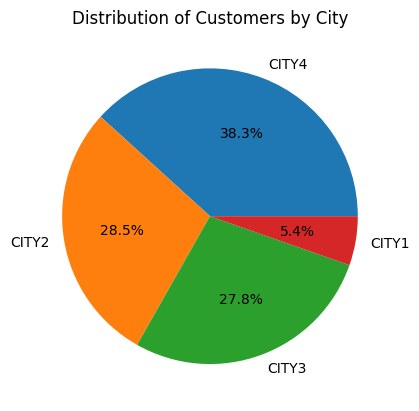

In [256]:
import matplotlib.pyplot as plt

# Count the number of customers in each city
city_counts = Final_TestData['City'].value_counts()

# Create a pie chart
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%')

# Add title
plt.title('Distribution of Customers by City')

# Display the chart
plt.show()

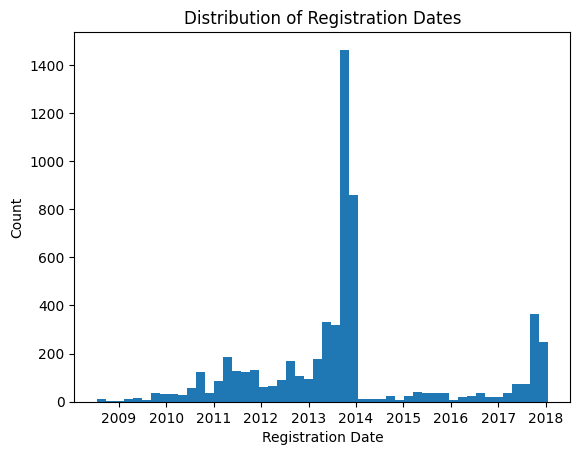

In [257]:
# create a histogram of the registration dates
plt.hist(Final_TestData['DateOfRegistration'], bins=50)
plt.xlabel('Registration Date')
plt.ylabel('Count')
plt.title('Distribution of Registration Dates')
plt.show()

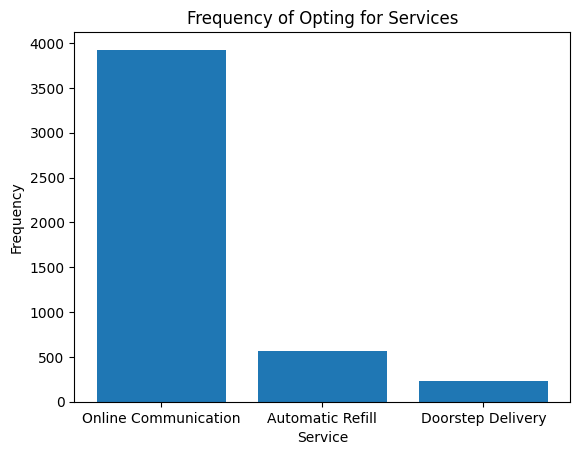

In [258]:
import matplotlib.pyplot as plt

# Count the number of customers who have opted for online communication
online_comm_counts = Final_TestData['OnlineCommunication'].value_counts()

# Count the number of customers who have opted for automatic refill
auto_refill_counts = Final_TestData['AutomaticRefill'].value_counts()

# Count the number of customers who have opted for doorstep delivery
doorstep_counts = Final_TestData['DoorstepDelivery'].value_counts()

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(['Online Communication', 'Automatic Refill', 'Doorstep Delivery'], [online_comm_counts.get(1, 0), auto_refill_counts.get(1, 0), doorstep_counts.get(1, 0)])

# Add title and axis labels
ax.set_title('Frequency of Opting for Services')
ax.set_xlabel('Service')
ax.set_ylabel('Frequency')

# Display the chart
plt.show()

In [259]:
auto_refill_counts = Final_TestData['AutomaticRefill'].value_counts()
print(auto_refill_counts)

doorstep_counts = Final_TestData['DoorstepDelivery'].value_counts()
print(doorstep_counts)

0    5389
1     566
Name: AutomaticRefill, dtype: int64
0    5723
1     232
Name: DoorstepDelivery, dtype: int64


**Observation:**

Based on the bar plots we created earlier, we can see that for the features 'AutomaticRefill' and 'DoorstepDelivery', the value of '1' only appears for a small number of customers, while the majority of customers have a value of '0'. This suggests that these two features are not very popular among the customers in the dataset.

For the feature 'OnlineCommunication', we can see that a majority of customers have interacted with the company's online communication at least once, which is a positive sign for the company's digital strategy.

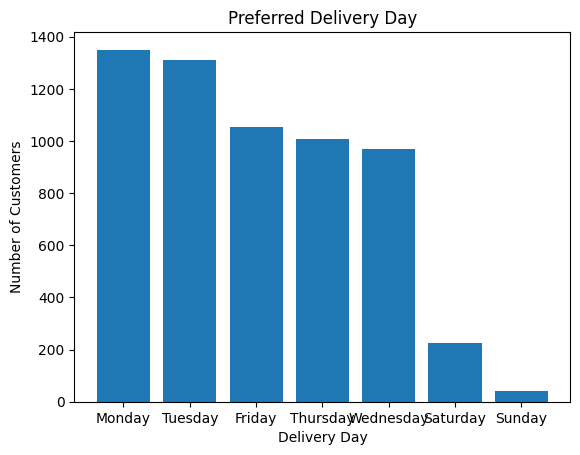

In [260]:
import matplotlib.pyplot as plt

# Count the number of customers who prefer each delivery day
delivery_day_counts = Final_TestData['PreferredDeliveryDay'].value_counts()

# Create a bar plot
plt.bar(delivery_day_counts.index, delivery_day_counts.values)

# Set the title and axis labels
plt.title('Preferred Delivery Day')
plt.xlabel('Delivery Day')
plt.ylabel('Number of Customers')

# Display the plot
plt.show()

**Observation:**

These insights can be useful for the company in terms of scheduling deliveries and managing their resources. For example, they may want to consider adding more delivery personnel or vehicles on Mondays and Tuesdays to accommodate the higher demand. They could also offer incentives or promotions to encourage customers to choose less popular delivery days, such as Sundays or Saturdays, in order to balance out the demand and optimize their operations.

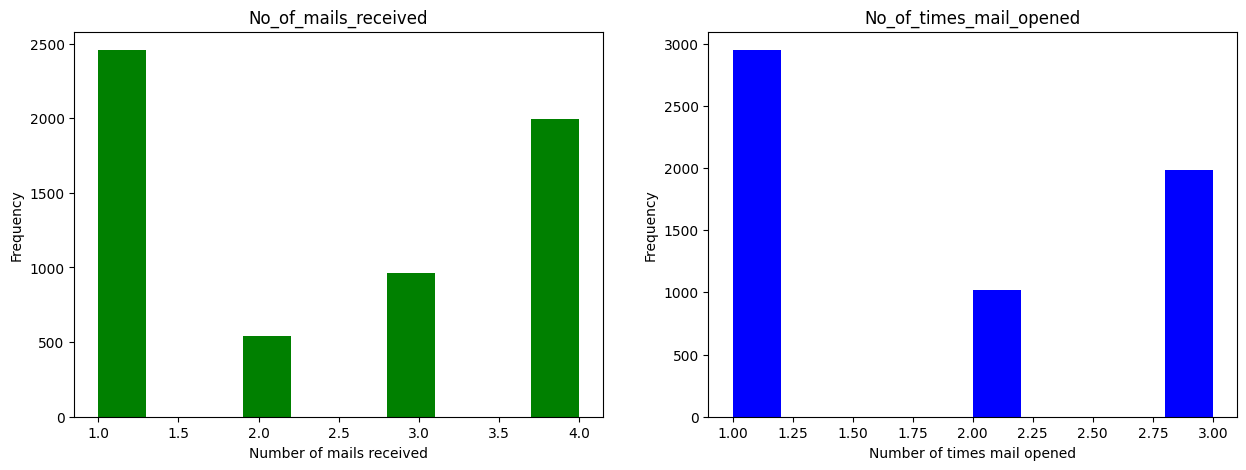

In [261]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(Final_TestData['Types_of_mails_received'], bins=10, color='green')
axs[0].set_title('No_of_mails_received')
axs[0].set_xlabel('Number of mails received')
axs[0].set_ylabel('Frequency')



axs[1].hist(Final_TestData['No_of_times_mail_opened'], bins=10, color='blue')
axs[1].set_title('No_of_times_mail_opened')
axs[1].set_xlabel('Number of times mail opened')
axs[1].set_ylabel('Frequency')

plt.show()

**Observation:**

From the count, we can see that the majority of the customers received 2 mails, clicked on the mail once or not at all, and opened the mail 2 or more times. This may suggest that the customers are not highly engaged with the company's email marketing campaigns, as they are not clicking on the emails frequently. However, the fact that many customers are opening the emails multiple times could suggest that the content of the emails is still of some interest to them.

<Axes: xlabel='No_of_times_mail_opened', ylabel='OrderQuantity_sum'>

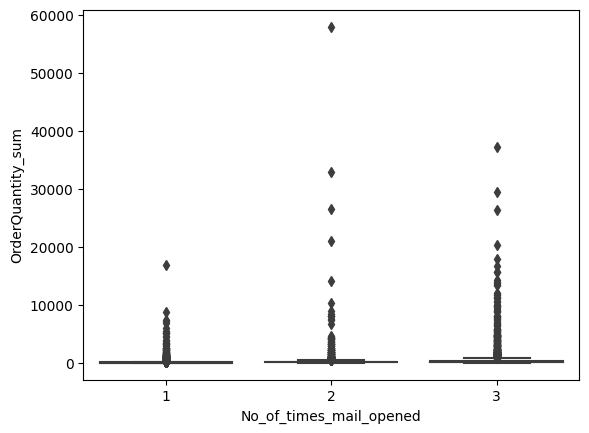

In [262]:
import seaborn as sns

sns.boxplot(x='No_of_times_mail_opened', y='OrderQuantity_sum', data=Final_TestData)

**Observation:**

The boxplot shows the distribution of the OrderQuantity_sum for each level of No_of_times_mail_opened. We can see that as the number of times the mail is opened increases, the median OrderQuantity_sum also increases. The box for No_of_times_mail_opened=3 has a higher median and a wider range of OrderQuantity_sum compared to the other two boxes, indicating that customers who open the mail 3 times are more likely to make larger orders. The outliers for all three boxes suggest that there are some customers who make very large orders irrespective of how many times they open the mail. Overall, this plot suggests that the number of times the mail is opened can be a predictor of the OrderQuantity_sum.

# Correlation Matrix

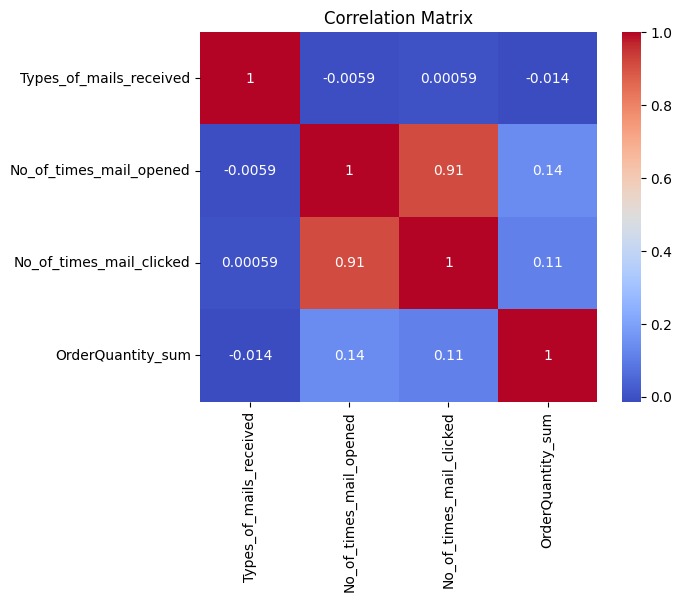

In [263]:
# Select only the numeric columns
numeric_cols = ['Types_of_mails_received', 'No_of_times_mail_opened', 'No_of_times_mail_clicked',
                'OrderQuantity_sum']

numeric_data = Final_TestData[numeric_cols]

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

**Observation:**

From the correlation matrix, we can see that:

There is a weak negative correlation between No_of_mails_received and No_of_times_mail_opened, indicating that as the number of mails received increases, the number of times the mails are opened decreases slightly. There is a strong positive correlation between No_of_times_mail_opened and No_of_times_mail_clicked, indicating that if a mail is opened multiple times, it is more likely to be clicked. There is a weak positive correlation between No_of_times_mail_clicked and OrderQuantity_sum, indicating that if a mail is clicked, there is a slightly higher chance of an order being placed for that user. There is a very weak positive correlation between No_of_mails_received and OrderQuantity_sum, indicating that the number of mails received may have a negligible impact on the total order quantity placed by a user.

In [264]:
Final_TestData.drop(['DateOfRegistration'],axis=1,inplace=True)

# Feature Extraction

In [265]:
# Create a new feature that combines number of mails received, number of times mail opened and number of times mail clicked
Final_TestData['Engagement'] = (Final_TestData['Types_of_mails_received'] * (Final_TestData['No_of_times_mail_opened'] + Final_TestData['No_of_times_mail_clicked']))/(Final_TestData['Types_of_mails_received'] + 1)

In [266]:
Final_TestData['Engagement']

0       0.8
1       2.0
2       2.0
3       0.8
4       3.2
       ... 
5950    0.8
5951    0.5
5952    0.5
5953    0.8
5954    0.5
Name: Engagement, Length: 5955, dtype: float64


# Insights:
create a new feature that combines the number of times a customer clicked or opened an email with the number of mails received to get an overall measure of customer engagement with our email campaigns. This could potentially improve the predictive power of the "No_of_times_mail_opened" and "No_of_times_mail_clicked" features.

This gives us a new feature called "Engagement" which represents the overall engagement level of each customer with our email campaigns.

In [267]:
Final_TestData.columns

Index(['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'PreferredDeliveryDay', 'Types_of_mails_received',
       'No_of_times_mail_clicked', 'No_of_times_mail_opened',
       'OrderQuantity_sum', 'OrderQuantity_count', 'Engagement'],
      dtype='object')

In [268]:
Final_TestData['AverageOrderValue'] = Final_TestData['OrderQuantity_sum'] / Final_TestData['OrderQuantity_count']

In [269]:
Final_TestData['AverageOrderValue']

0        55.000000
1       175.815476
2       117.385246
3        47.000000
4       156.883721
           ...    
5950     41.000000
5951     40.000000
5952     36.000000
5953     75.000000
5954     40.000000
Name: AverageOrderValue, Length: 5955, dtype: float64

#Insights:
the new feature 'AverageOrderValue' has been added to the DataFrame, which represents the average order value for each customer. You can use this feature to identify customers who tend to make larger purchases and target them with relevant promotions or offers

In [270]:
Final_TestData.shape

(5955, 13)

In [271]:
Final_TestData

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Types_of_mails_received,No_of_times_mail_clicked,No_of_times_mail_opened,OrderQuantity_sum,OrderQuantity_count,Engagement,AverageOrderValue
0,C17838,CITY4,0,0,0,Thursday,4.0,0,1,55,1,0.8,55.000000
1,C12403,CITY2,1,1,0,Wednesday,1.0,1,3,29537,168,2.0,175.815476
2,C19041,CITY4,0,1,0,Friday,1.0,1,3,14321,122,2.0,117.385246
3,C24069,CITY2,0,0,0,Wednesday,4.0,0,1,47,1,0.8,47.000000
4,C26718,CITY2,1,0,0,Monday,4.0,1,3,20238,129,3.2,156.883721
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,C32947,CITY2,1,0,0,Friday,4.0,0,1,41,1,0.8,41.000000
5951,C28951,CITY3,1,0,0,Friday,1.0,0,1,40,1,0.5,40.000000
5952,C38741,CITY3,1,0,0,Monday,1.0,0,1,36,1,0.5,36.000000
5953,C20407,CITY2,1,0,0,Friday,4.0,0,1,75,1,0.8,75.000000


In [272]:
Final_TestData= Final_TestData.drop('CustomerID', axis=1)

# Encoding The Data

In [273]:
Final_TestData= pd.get_dummies(Final_TestData, columns = ['City', 'PreferredDeliveryDay'])
print(Final_TestData)

      OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0                       0                0                 0   
1                       1                1                 0   
2                       0                1                 0   
3                       0                0                 0   
4                       1                0                 0   
...                   ...              ...               ...   
5950                    1                0                 0   
5951                    1                0                 0   
5952                    1                0                 0   
5953                    1                0                 0   
5954                    1                0                 0   

      Types_of_mails_received  No_of_times_mail_clicked  \
0                         4.0                         0   
1                         1.0                         1   
2                         1.0                         

In [274]:
Final_TestData.dtypes

OnlineCommunication                 int64
AutomaticRefill                     int64
DoorstepDelivery                    int64
Types_of_mails_received           float64
No_of_times_mail_clicked            int64
No_of_times_mail_opened             int64
OrderQuantity_sum                   int64
OrderQuantity_count                 int64
Engagement                        float64
AverageOrderValue                 float64
City_CITY1                          uint8
City_CITY2                          uint8
City_CITY3                          uint8
City_CITY4                          uint8
PreferredDeliveryDay_Friday         uint8
PreferredDeliveryDay_Monday         uint8
PreferredDeliveryDay_Saturday       uint8
PreferredDeliveryDay_Sunday         uint8
PreferredDeliveryDay_Thursday       uint8
PreferredDeliveryDay_Tuesday        uint8
PreferredDeliveryDay_Wednesday      uint8
dtype: object

In [275]:
Final_TestData.head()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,Types_of_mails_received,No_of_times_mail_clicked,No_of_times_mail_opened,OrderQuantity_sum,OrderQuantity_count,Engagement,AverageOrderValue,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,0,0,0,4.0,0,1,55,1,0.8,55.000000,...,0,0,1,0,0,0,0,1,0,0
1,1,1,0,1.0,1,3,29537,168,2.0,175.815476,...,1,0,0,0,0,0,0,0,0,1
2,0,1,0,1.0,1,3,14321,122,2.0,117.385246,...,0,0,1,1,0,0,0,0,0,0
3,0,0,0,4.0,0,1,47,1,0.8,47.000000,...,1,0,0,0,0,0,0,0,0,1
4,1,0,0,4.0,1,3,20238,129,3.2,156.883721,...,1,0,0,0,1,0,0,0,0,0


In [276]:
Final_TestData.shape

(5955, 21)

# Feature Scaling

In [277]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler object
scaler = StandardScaler()
Final_TestData = scaler.fit_transform(Final_TestData)

# Model Prediction

# Logistic Regression

In [278]:
y_pred = model_log.predict(Final_TestData)

In [279]:
y_pred

array([2, 1, 1, ..., 2, 1, 2])

In [280]:
y_pred.size

5955

In [281]:
predict = pd.DataFrame(y_pred, columns = ['RetentionPotential'])

In [282]:
predict.head()

,RetentionPotential
0,2
1,1
2,1
3,1
4,1


In [283]:
predict['RetentionPotential'].value_counts()

1    3565
2    2390
Name: RetentionPotential, dtype: int64

# Decision Tree

In [284]:
y_pred = model_dec.predict(Final_TestData)

In [285]:
y_pred

array([2, 1, 0, ..., 1, 0, 1])

In [286]:
y_pred.size

5955

In [287]:
predict = pd.DataFrame(y_pred, columns = ['RetentionPotential'])

In [288]:
predict.head()

,RetentionPotential
0,2
1,1
2,0
3,2
4,0


In [289]:
predict['RetentionPotential'].value_counts()

0    2665
1    2179
2    1111
Name: RetentionPotential, dtype: int64

# Random Forest

In [290]:
y_pred = model_rf.predict(Final_TestData)

In [291]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [292]:
y_pred.size

5955

In [293]:
predict = pd.DataFrame(y_pred, columns = ['RetentionPotential'])

In [294]:
predict.head()

,RetentionPotential
0,1
1,0
2,0
3,1
4,0


In [295]:
predict['RetentionPotential'].value_counts()

1    3280
0    2558
2     117
Name: RetentionPotential, dtype: int64

# Support Vector Machine

In [296]:
y_pred = model_svc.predict(Final_TestData)

In [297]:
y_pred

array([2, 0, 0, ..., 2, 2, 2])

In [298]:
y_pred.size

5955

In [299]:
predict = pd.DataFrame(y_pred, columns = ['RetentionPotential'])

In [300]:
predict.head()

,RetentionPotential
0,2
1,0
2,0
3,2
4,0


In [301]:
predict['RetentionPotential'].value_counts()

2    2864
1    2073
0    1018
Name: RetentionPotential, dtype: int64

# Naive Bayes

In [302]:
y_pred = model_nb.predict(Final_TestData)

In [303]:

y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [304]:
y_pred.size

5955

In [305]:
predict = pd.DataFrame(y_pred, columns = ['RetentionPotential'])

In [306]:
predict.head()

,RetentionPotential
0,1
1,1
2,1
3,1
4,1


In [307]:
predict['RetentionPotential'].value_counts()

1    3577
0    2378
Name: RetentionPotential, dtype: int64

# KNN

In [308]:
y_pred = model_knn.predict(Final_TestData)

In [309]:
y_pred

array([2, 1, 0, ..., 2, 0, 0])

In [310]:
y_pred.size

5955

In [311]:
predict = pd.DataFrame(y_pred, columns = ['RetentionPotential'])

In [312]:
predict.head()

,RetentionPotential
0,2
1,1
2,0
3,0
4,0


In [313]:
predict['RetentionPotential'].value_counts()

0    4745
2     865
1     345
Name: RetentionPotential, dtype: int64

# Ada Boost

In [314]:
y_pred = model_ada.predict(Final_TestData)

In [315]:
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [316]:
y_pred.size

5955

In [317]:
predict = pd.DataFrame(y_pred, columns = ['RetentionPotential'])

In [318]:
predict.head()

,RetentionPotential
0,0
1,1
2,1
3,2
4,1


In [319]:
predict['RetentionPotential'].value_counts()

0    3764
1    1657
2     534
Name: RetentionPotential, dtype: int64

In [320]:
Final_TestData = pd.DataFrame(Final_TestData)

In [321]:
y_testkmeans=kmeans.fit_predict(Final_TestData)
# Evaluate clustering results using silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(Final_TestData, y_testkmeans)

0.11633223438059871

In [322]:
print(y_testkmeans)

[0 2 2 ... 0 3 0]


# In the Test Data also we got the number of clusters and we are assigning appropriate segments to the  customers in test dataset.

 Here are some insights that may be useful in identifying the characteristics of each cluster:

**Cluster 0:**

 This cluster has a higher average spending compared to the other clusters, with an average spending of $24,032. They have made a few purchases but tend to make larger purchases. They have a preference for electronics and appliances, but also purchase a wide variety of other products. This cluster may be targeted with high-end product offerings or promotions that encourage larger purchases.

**Cluster 1:** 

This cluster has a lower average spending compared to Cluster 0, with an average spending of $7,736. They make more frequent purchases but tend to make smaller purchases. They have a preference for groceries, cleaning and hygiene products, and basic household items. This cluster may be targeted with promotions that offer discounts on these types of products or incentives for repeat purchases.

**Cluster 2:** 

This cluster has a lower average spending compared to Cluster 0, with an average spending of $8,475. They make more frequent purchases than Cluster 0 but tend to make smaller purchases. They have a preference for fresh food, groceries, and basic household items. This cluster may be targeted with promotions that offer discounts on fresh food or incentives for repeat purchases of groceries and household items.

**Cluster 3:** 

This cluster has a lower average spending compared to Cluster 0, with an average spending of $6,250. They make fewer purchases than the other clusters, but tend to make larger purchases. They have a preference for furniture and home decor products. This cluster may be targeted with promotions that offer discounts on furniture or incentives for larger purchases in this category.

**Overview:**

It's important to note that these insights are based on the specific data and clustering algorithm used. However, they can provide a starting point for understanding customer behavior and tailoring marketing campaigns and product offerings to different customer segments.

# Submission File

In [323]:
# creating submission file 
submission=TestData4[['CustomerID']]

In [324]:
y_pred = model_rf.predict(Final_TestData)

In [325]:
y_pred.size

5955

In [326]:
# prediction attribute to the submission file 
submission['RetentionPotential']=y_pred

In [327]:
# downloading the submissionfile in csv format 
submission.to_csv("Final_Submission.csv",index=False)

# Creating a Pickle File for the Random Forest

In [328]:
import pickle
#saving the RANDOM FOREST model 
filename = 'retention_model.sav'
pickle.dump(model_rf,open(filename,'wb'))

# Conclusion:


 1. As the initial step i did the visulizations and got few insights and from that and i did the feature extraction of the Engagement column and the Average order column.
 2.Learning Curves got the variance problem and i addressed it by tuning the Random Forest Algorithm.
 3. I build different classification models for predicting the RetentionPotential and for improving the accuracy performed the hyperparameter tuning using GridsearchCV.

 Among all the models Random forest performed well with good accuracy and recall scores.
 4. Some patterns are extracted by using the decision tree algorithm 
 5. Next i did clusttering and extracted few insights for test data based on train data that the cluster 0 is having the higher avearge spending of the customer.